In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('combined_discovery_yield.csv')
df


testing batch  Total Ideal Compounds  Low Error Count  Discovery Yield  \
0                1                   21.0             11.0         0.523810   
1                2                   37.0             18.0         0.486486   
2                3                   24.0              9.0         0.375000   
3                4                   43.0             18.0         0.418605   
4                5                   44.0             17.0         0.386364   
..             ...                    ...              ...              ...   
337              6                   80.0             35.0         0.437500   
338              7                   94.0             44.0         0.468085   
339              8                   80.0             40.0         0.500000   
340              9                   79.0             40.0         0.506329   
341             10                   72.0             35.0         0.486111   

     Standardized Discovery Yield            Target Variable Method  \
0                        1.995465  target_CHEMBL240     logp     RF   
1                        1.051863  target_CHEMBL240     logp     RF   
2                        1.250000  target_CHEMBL240     logp     RF   
3                        0.778799  target_CHEMBL240     logp     RF   
4                        0.702479  target_CHEMBL240     logp     RF   
..                            ...               ...      ...    ...   
337                      0.612500  target_CHEMBL279      NaN    MLP   
338                      0.557718  target_CHEMBL279      NaN    MLP   
339                      0.700000  target_CHEMBL279      NaN    MLP   
340                      0.717834  target_CHEMBL279      NaN    MLP   
341                      0.756173  target_CHEMBL279      NaN    MLP   

           evalt  
0     sorted_fcv  
1     sorted_fcv  
2     sorted_fcv  
3     sorted_fcv  
4     sorted_fcv  
..           ...  
337  scaffold_CV  
338  scaffold_CV  
339  scaffold_CV  
340  scaffold_CV  
341  scaffold_CV  

[342 rows x 9 columns]

In [3]:
mean = df[df["Method"]=="RF"]

mean.groupby("evalt")[["Discovery Yield"]].describe() 


Discovery Yield                                          \
                       count      mean       std       min       25%   
evalt                                                                  
cv                      30.0  0.717291  0.058906  0.600000  0.675995   
scaffold_CV             30.0  0.586071  0.125375  0.250000  0.524562   
sorted_fcv              27.0  0.547671  0.103481  0.360000  0.482680   
unsorted_fcv            27.0  0.627578  0.094333  0.395833  0.574464   

                                            
                   50%       75%       max  
evalt                                       
cv            0.709651  0.754573  0.823529  
scaffold_CV   0.617011  0.665624  0.783784  
sorted_fcv    0.552083  0.613187  0.731343  
unsorted_fcv  0.622222  0.720676  0.745098

target_CHEMBL240
sorted_fcv


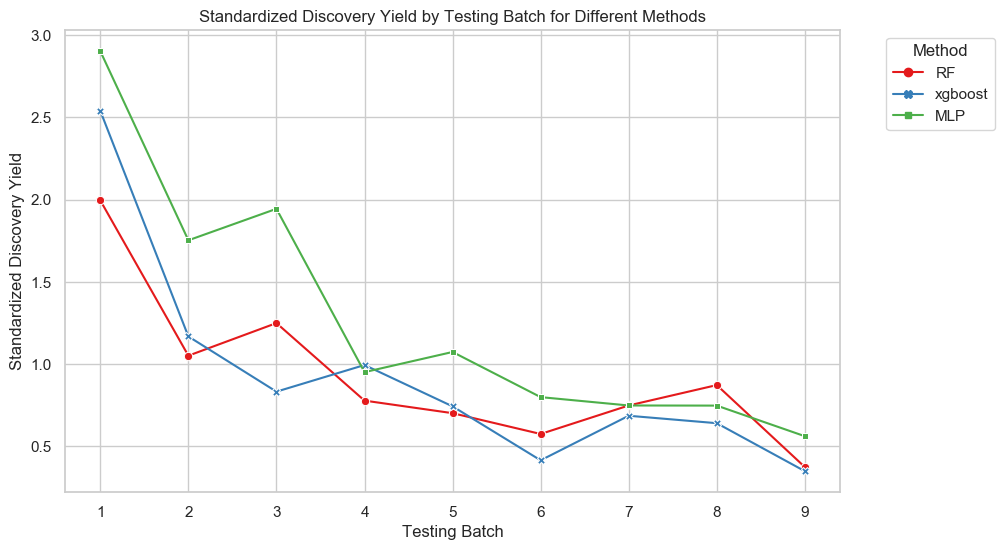

target_CHEMBL240
unsorted_fcv


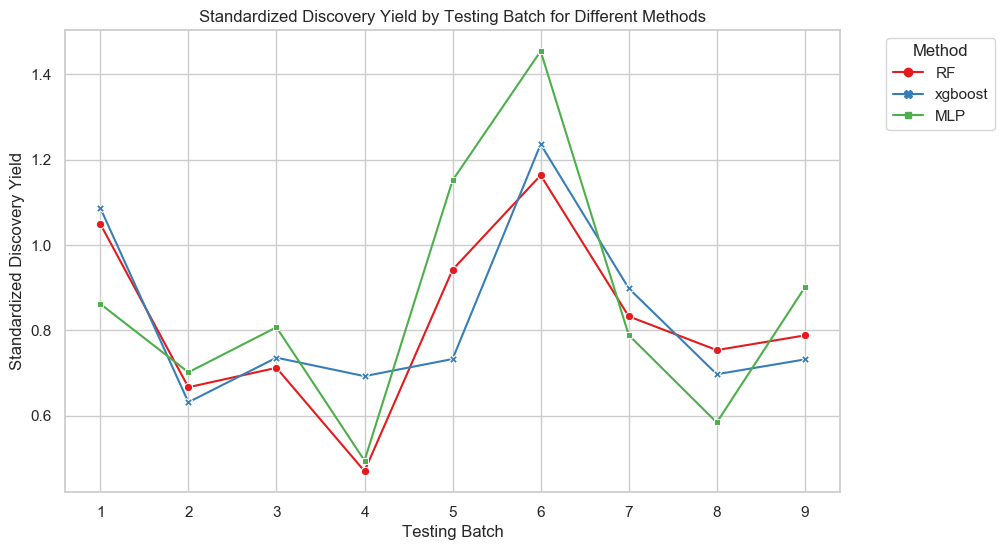

target_CHEMBL240
cv


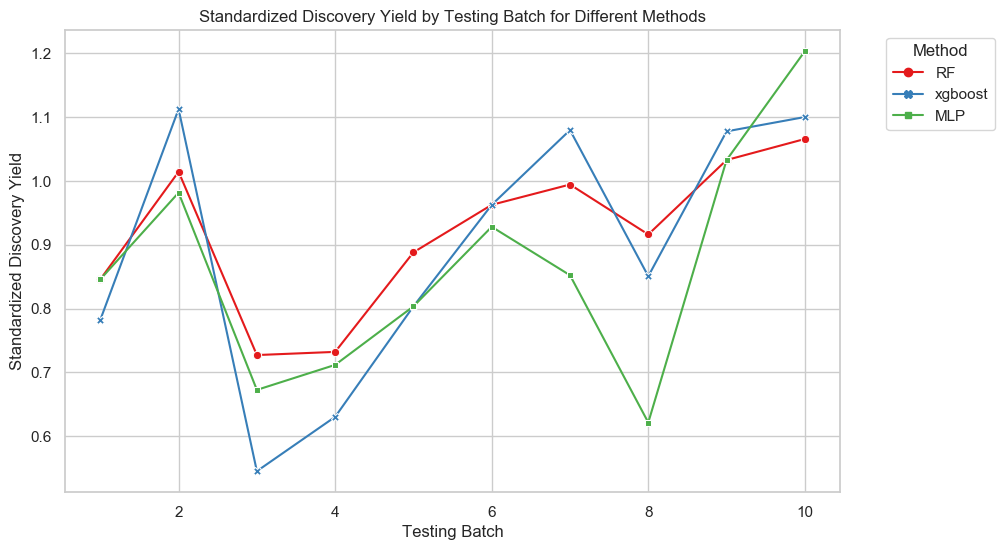

target_CHEMBL240
scaffold_CV


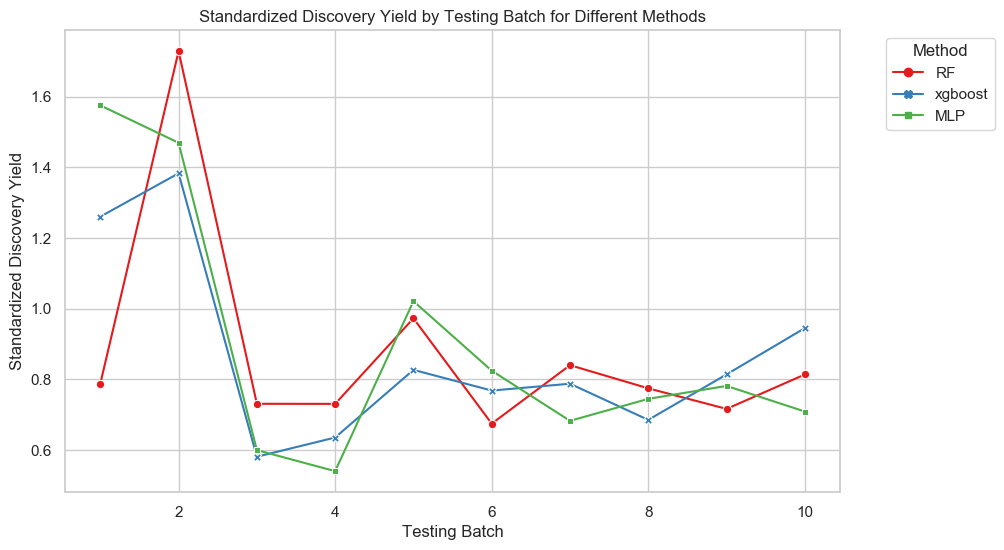

target_CHEMBL260
sorted_fcv


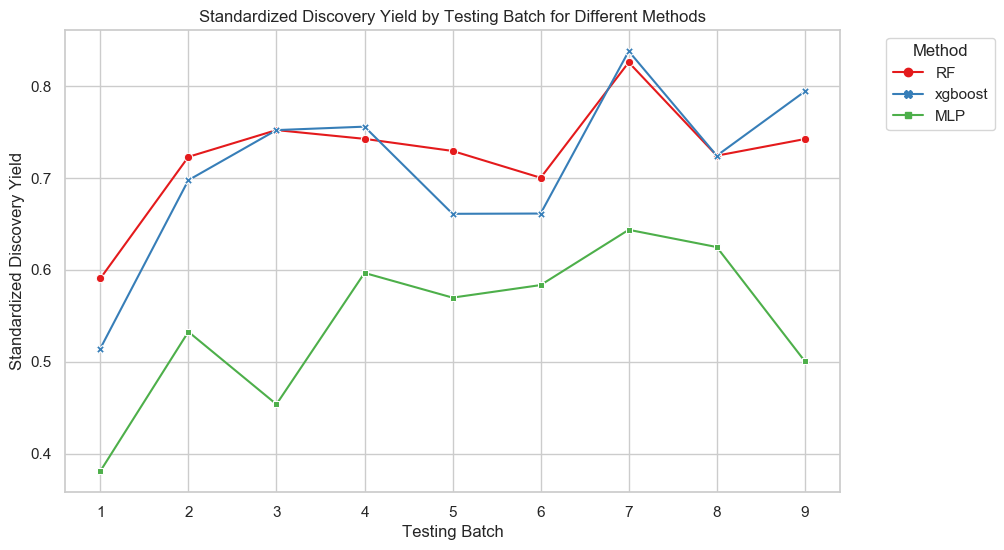

target_CHEMBL260
unsorted_fcv


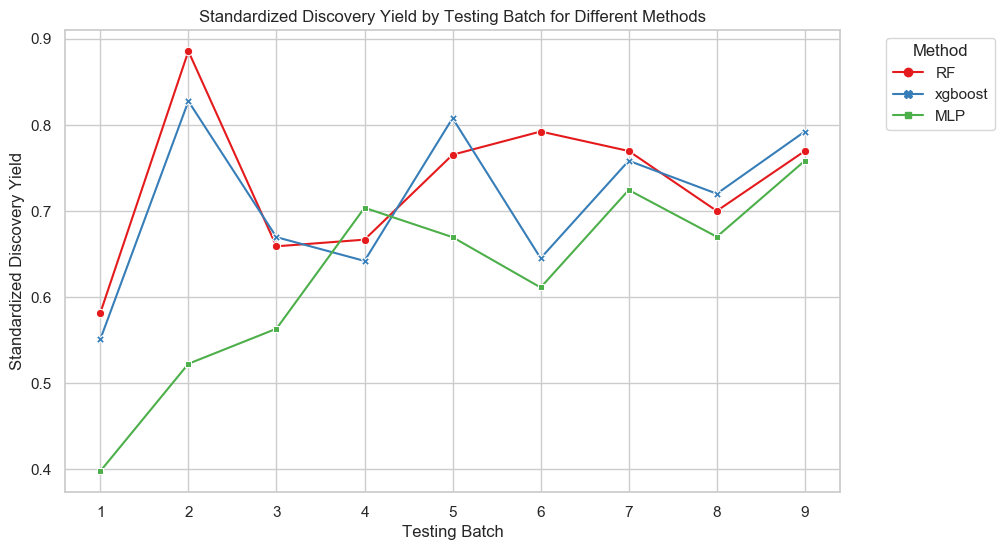

target_CHEMBL260
cv


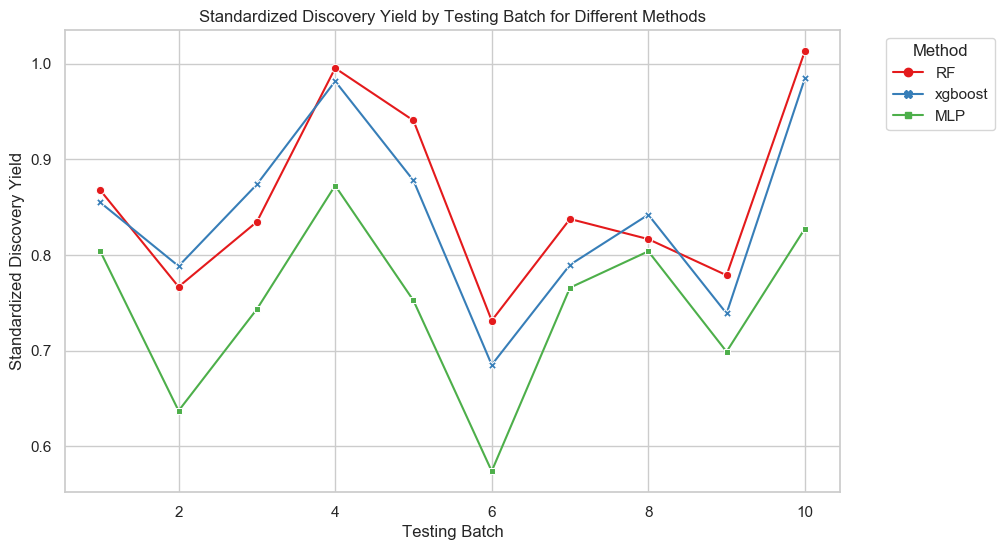

target_CHEMBL260
scaffold_CV


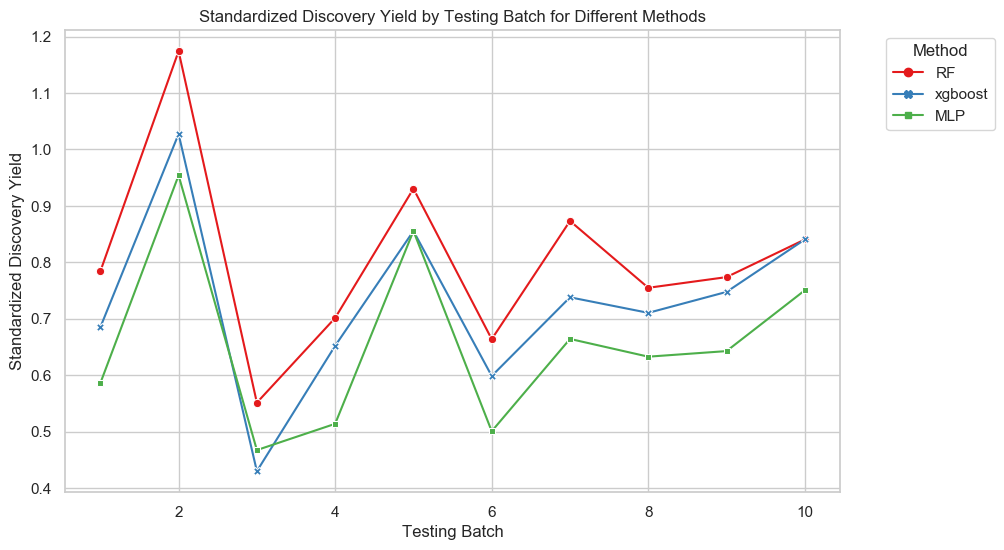

target_CHEMBL279
sorted_fcv


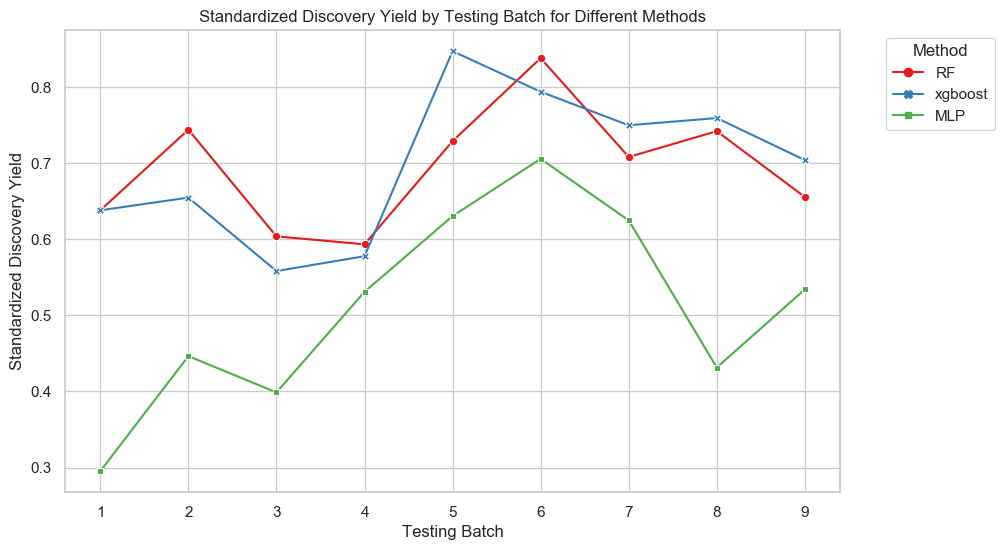

target_CHEMBL279
unsorted_fcv


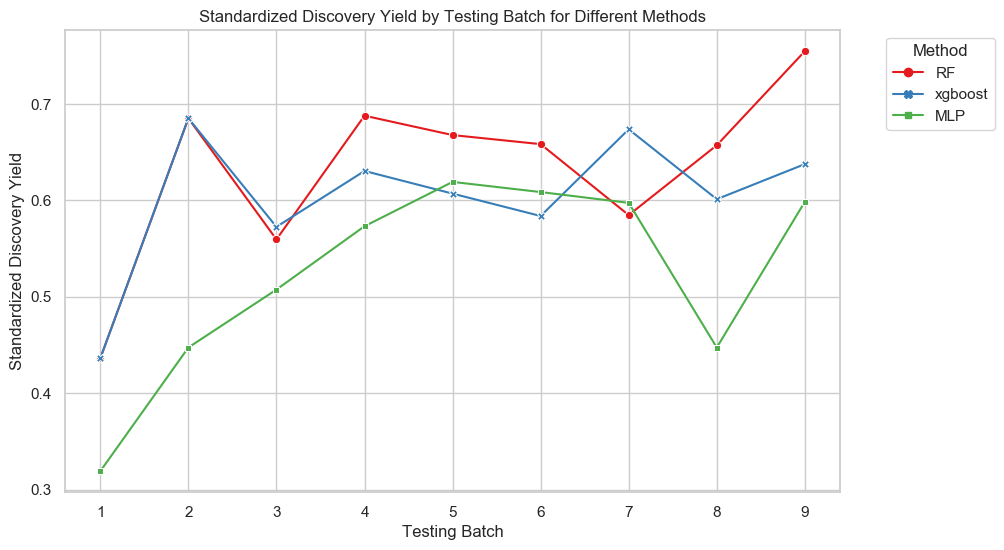

target_CHEMBL279
cv


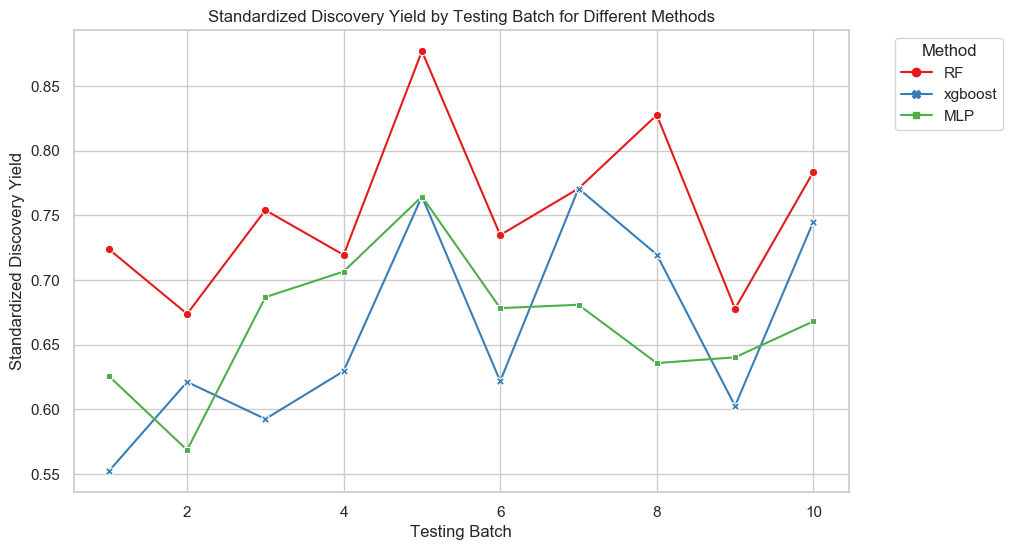

target_CHEMBL279
scaffold_CV


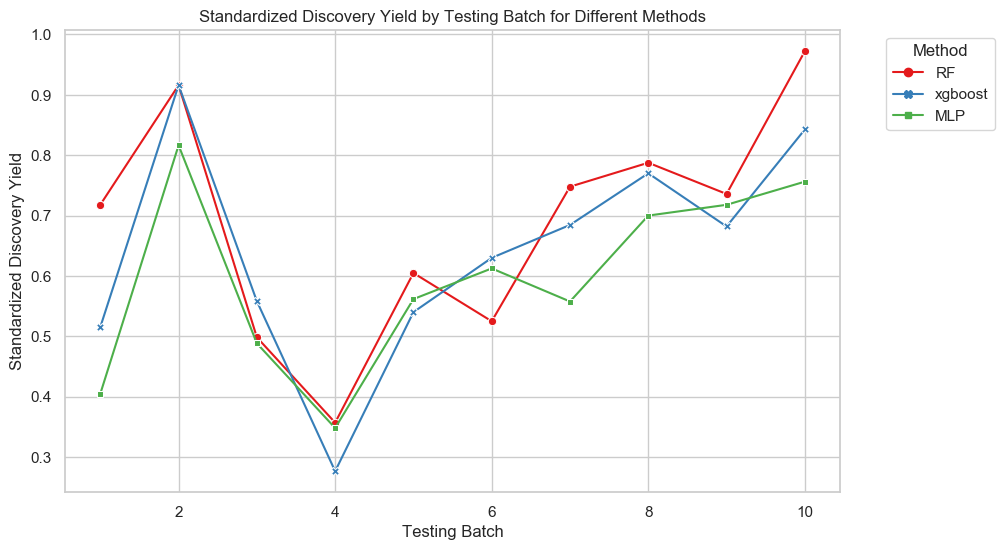

In [4]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    for evalt in df.evalt.unique():    
        print(target)
        print(evalt)

        test = df[df["Target"]==target]
        test = test[test["evalt"]==evalt]
        test = test[test["Variable"]!="pchembl"]
        # Set up the visualization


        plt.figure(figsize=(10, 6))

        # Create a line plot with scatter points
        sns.lineplot(data=test, x='testing batch', y='Standardized Discovery Yield', hue='Method', 
                     marker='o', palette='Set1', markers=True, style='Method', dashes=False)

        # Customize the plot
        plt.title('Standardized Discovery Yield by Testing Batch for Different Methods')
        plt.xlabel('Testing Batch')
        plt.ylabel('Standardized Discovery Yield')
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.show()

target_CHEMBL240
sorted_fcv


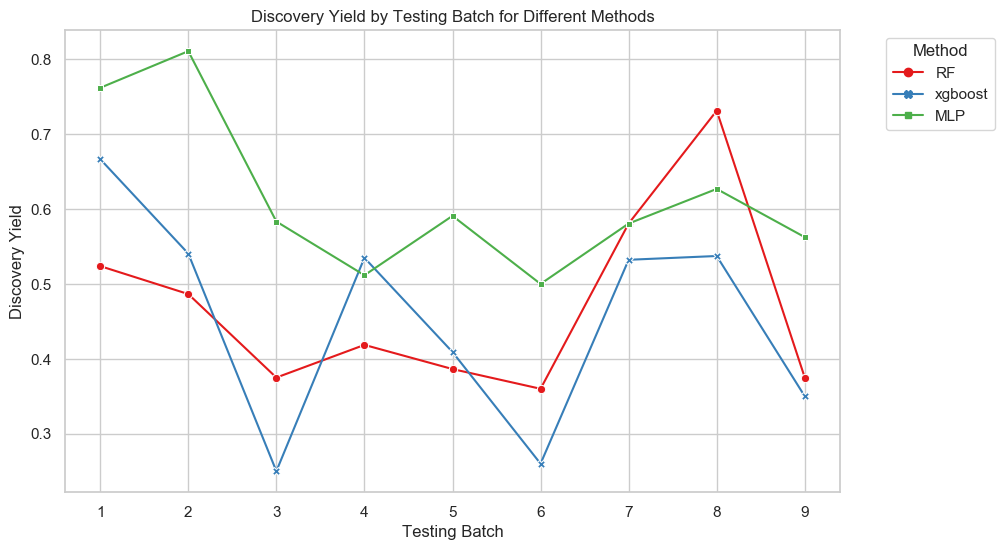

target_CHEMBL240
unsorted_fcv


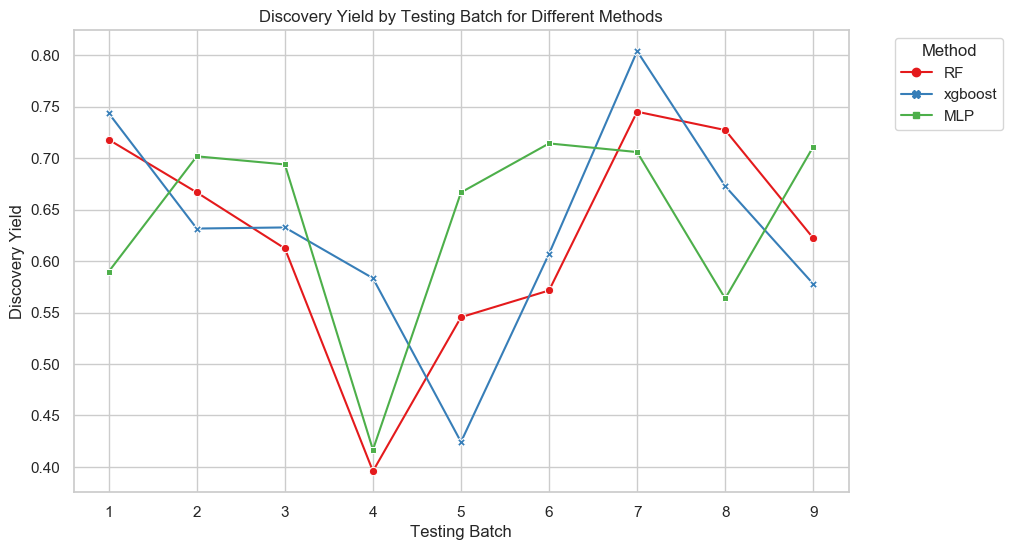

target_CHEMBL240
cv


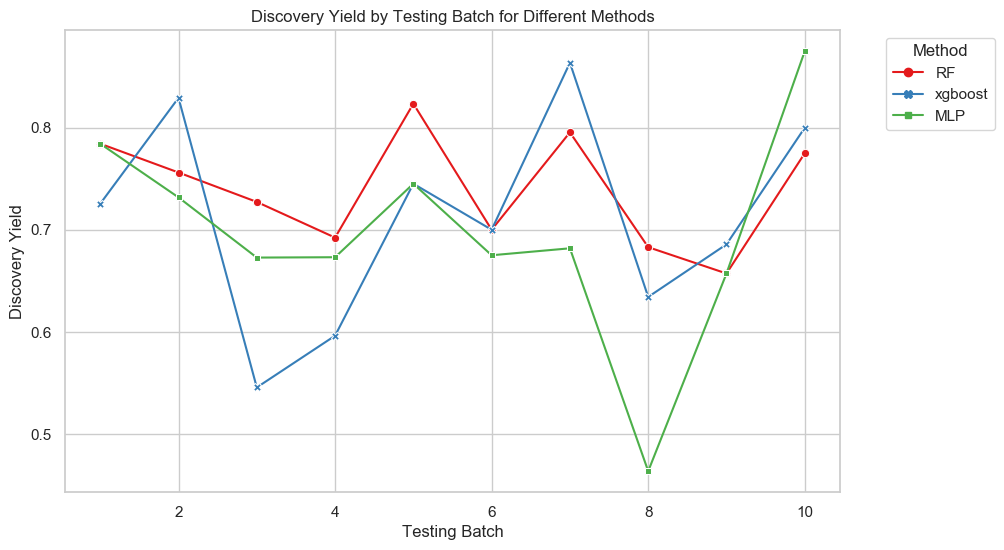

target_CHEMBL240
scaffold_CV


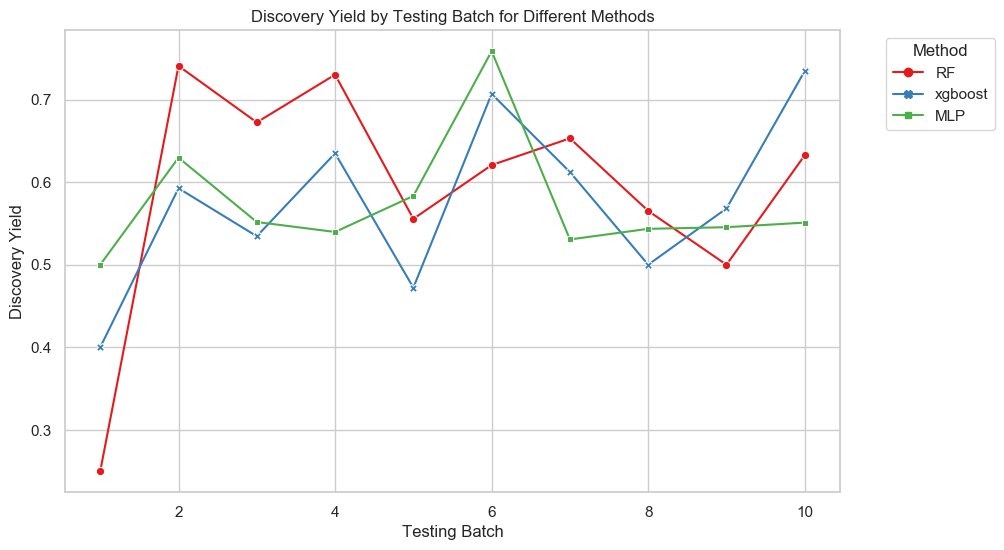

target_CHEMBL260
sorted_fcv


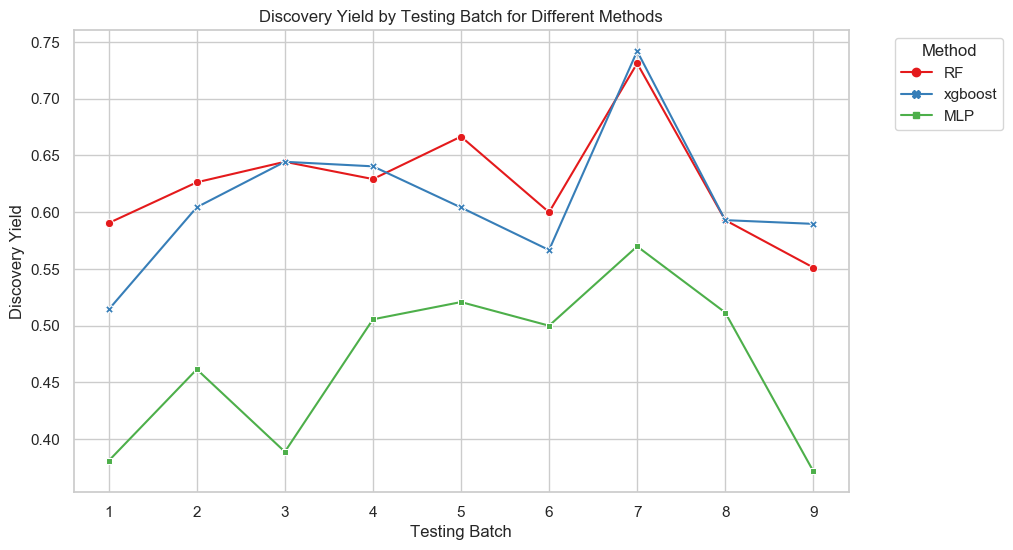

target_CHEMBL260
unsorted_fcv


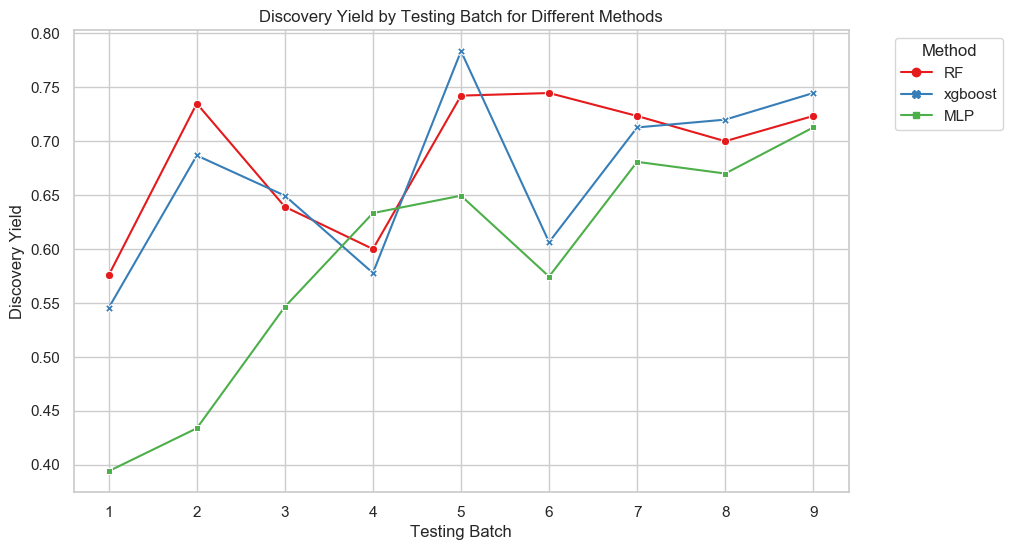

target_CHEMBL260
cv


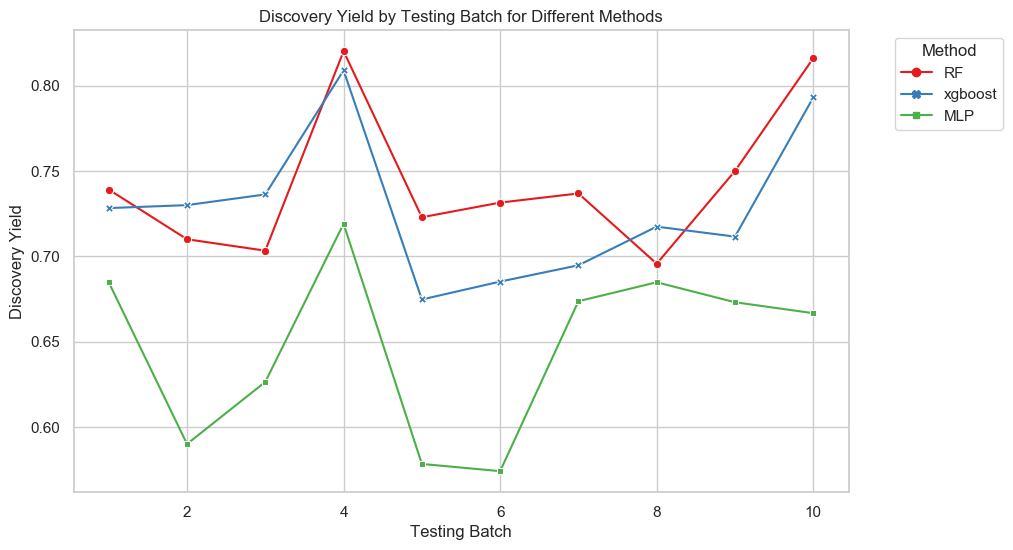

target_CHEMBL260
scaffold_CV


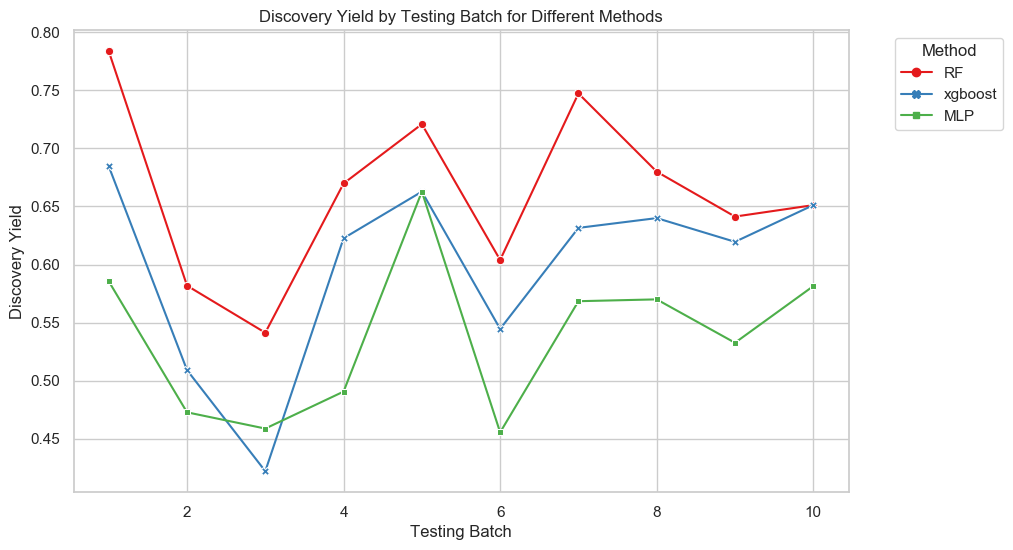

target_CHEMBL279
sorted_fcv


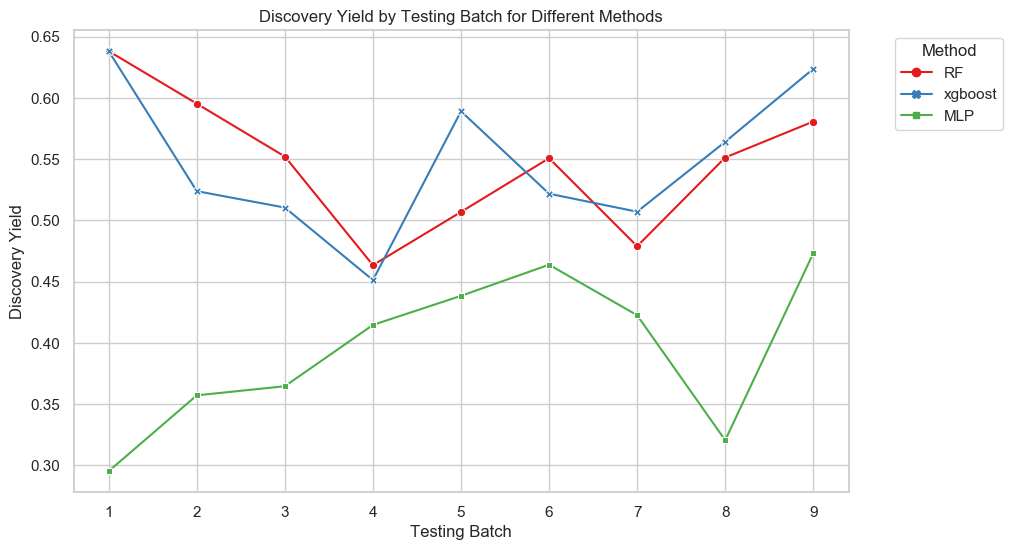

target_CHEMBL279
unsorted_fcv


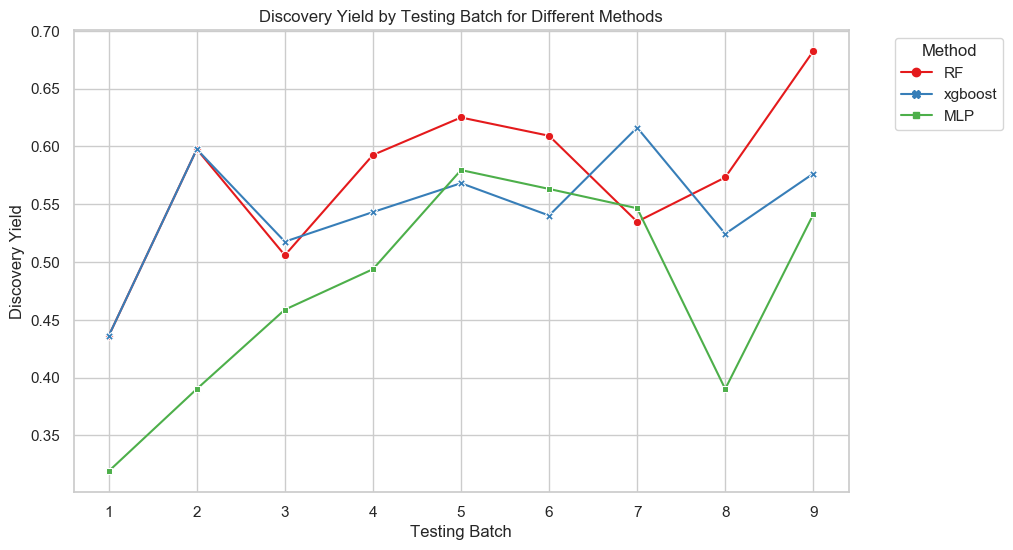

target_CHEMBL279
cv


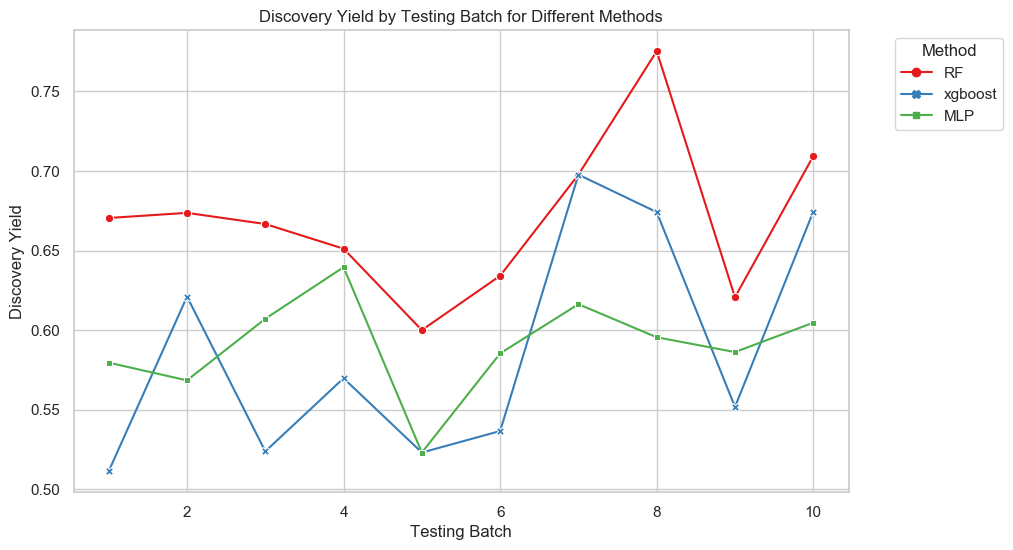

target_CHEMBL279
scaffold_CV


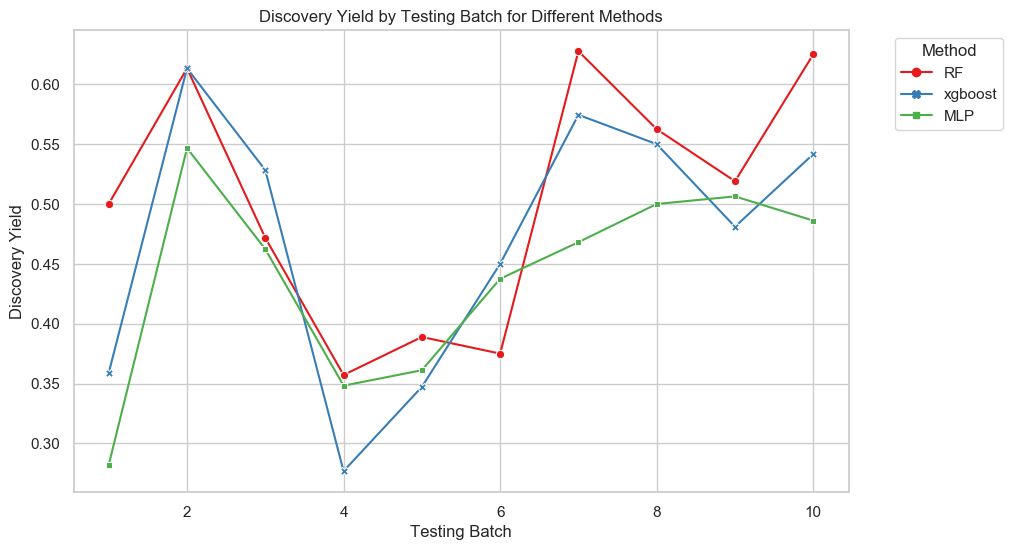

In [5]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    for evalt in df.evalt.unique():    
        print(target)
        print(evalt)

        test = df[df["Target"]==target]
        test = test[test["evalt"]==evalt]
        test = test[test["Variable"]!="pchembl"]
        # Set up the visualization


        plt.figure(figsize=(10, 6))

        # Create a line plot with scatter points
        sns.lineplot(data=test, x='testing batch', y='Discovery Yield', hue='Method', 
                     marker='o', palette='Set1', markers=True, style='Method', dashes=False)

        # Customize the plot
        plt.title('Discovery Yield by Testing Batch for Different Methods')
        plt.xlabel('Testing Batch')
        plt.ylabel('Discovery Yield')
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.show()

sorted_fcv


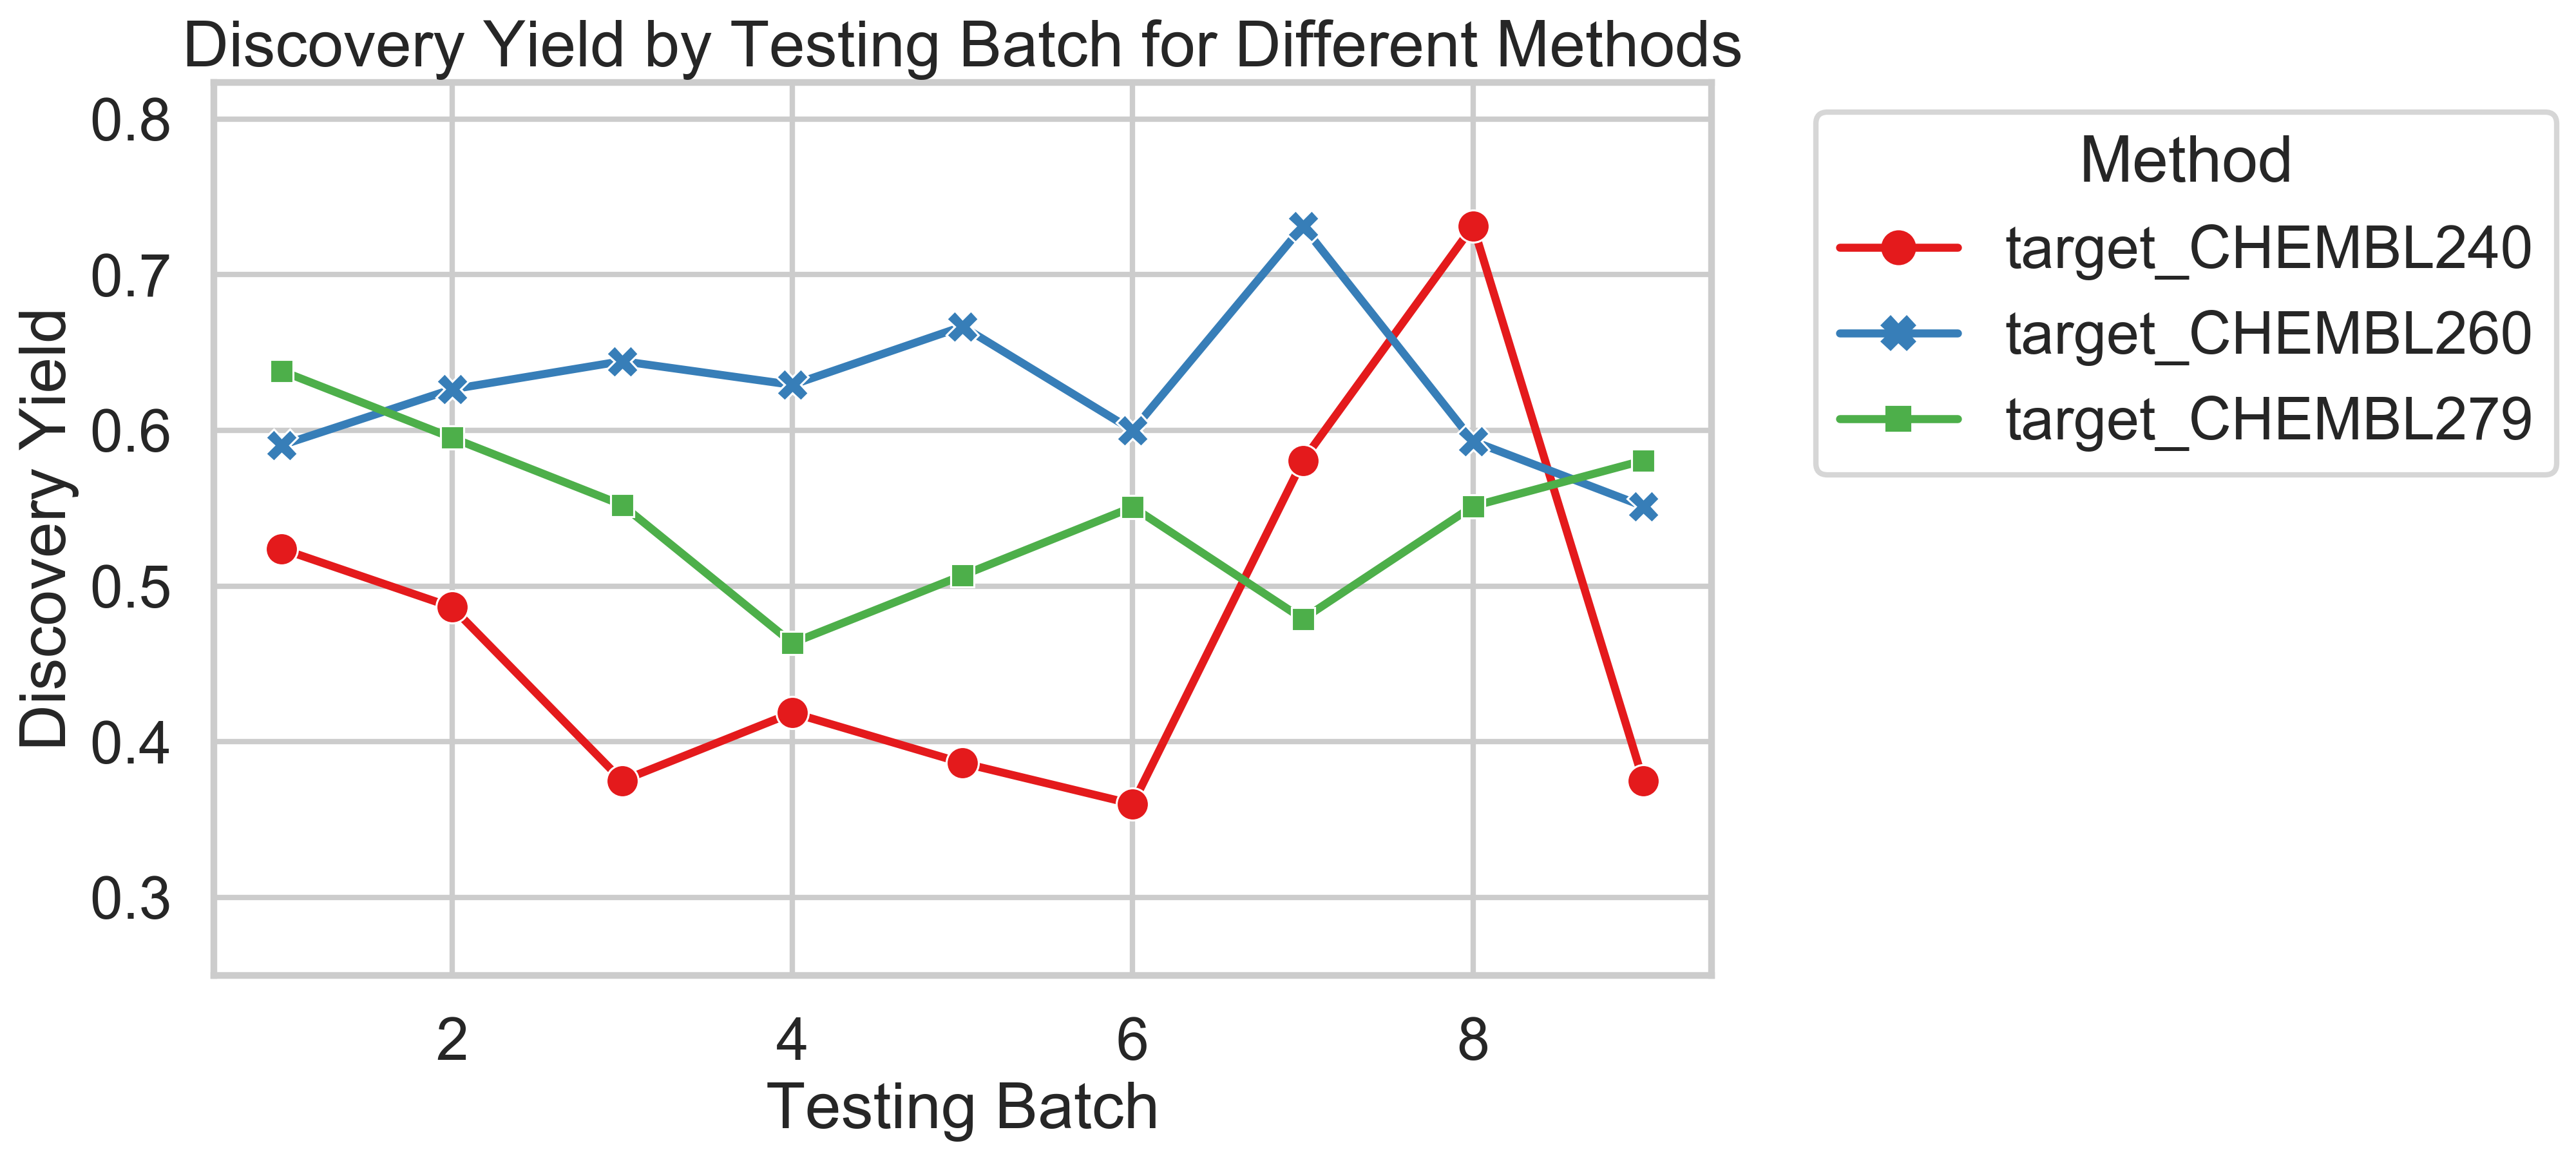

unsorted_fcv


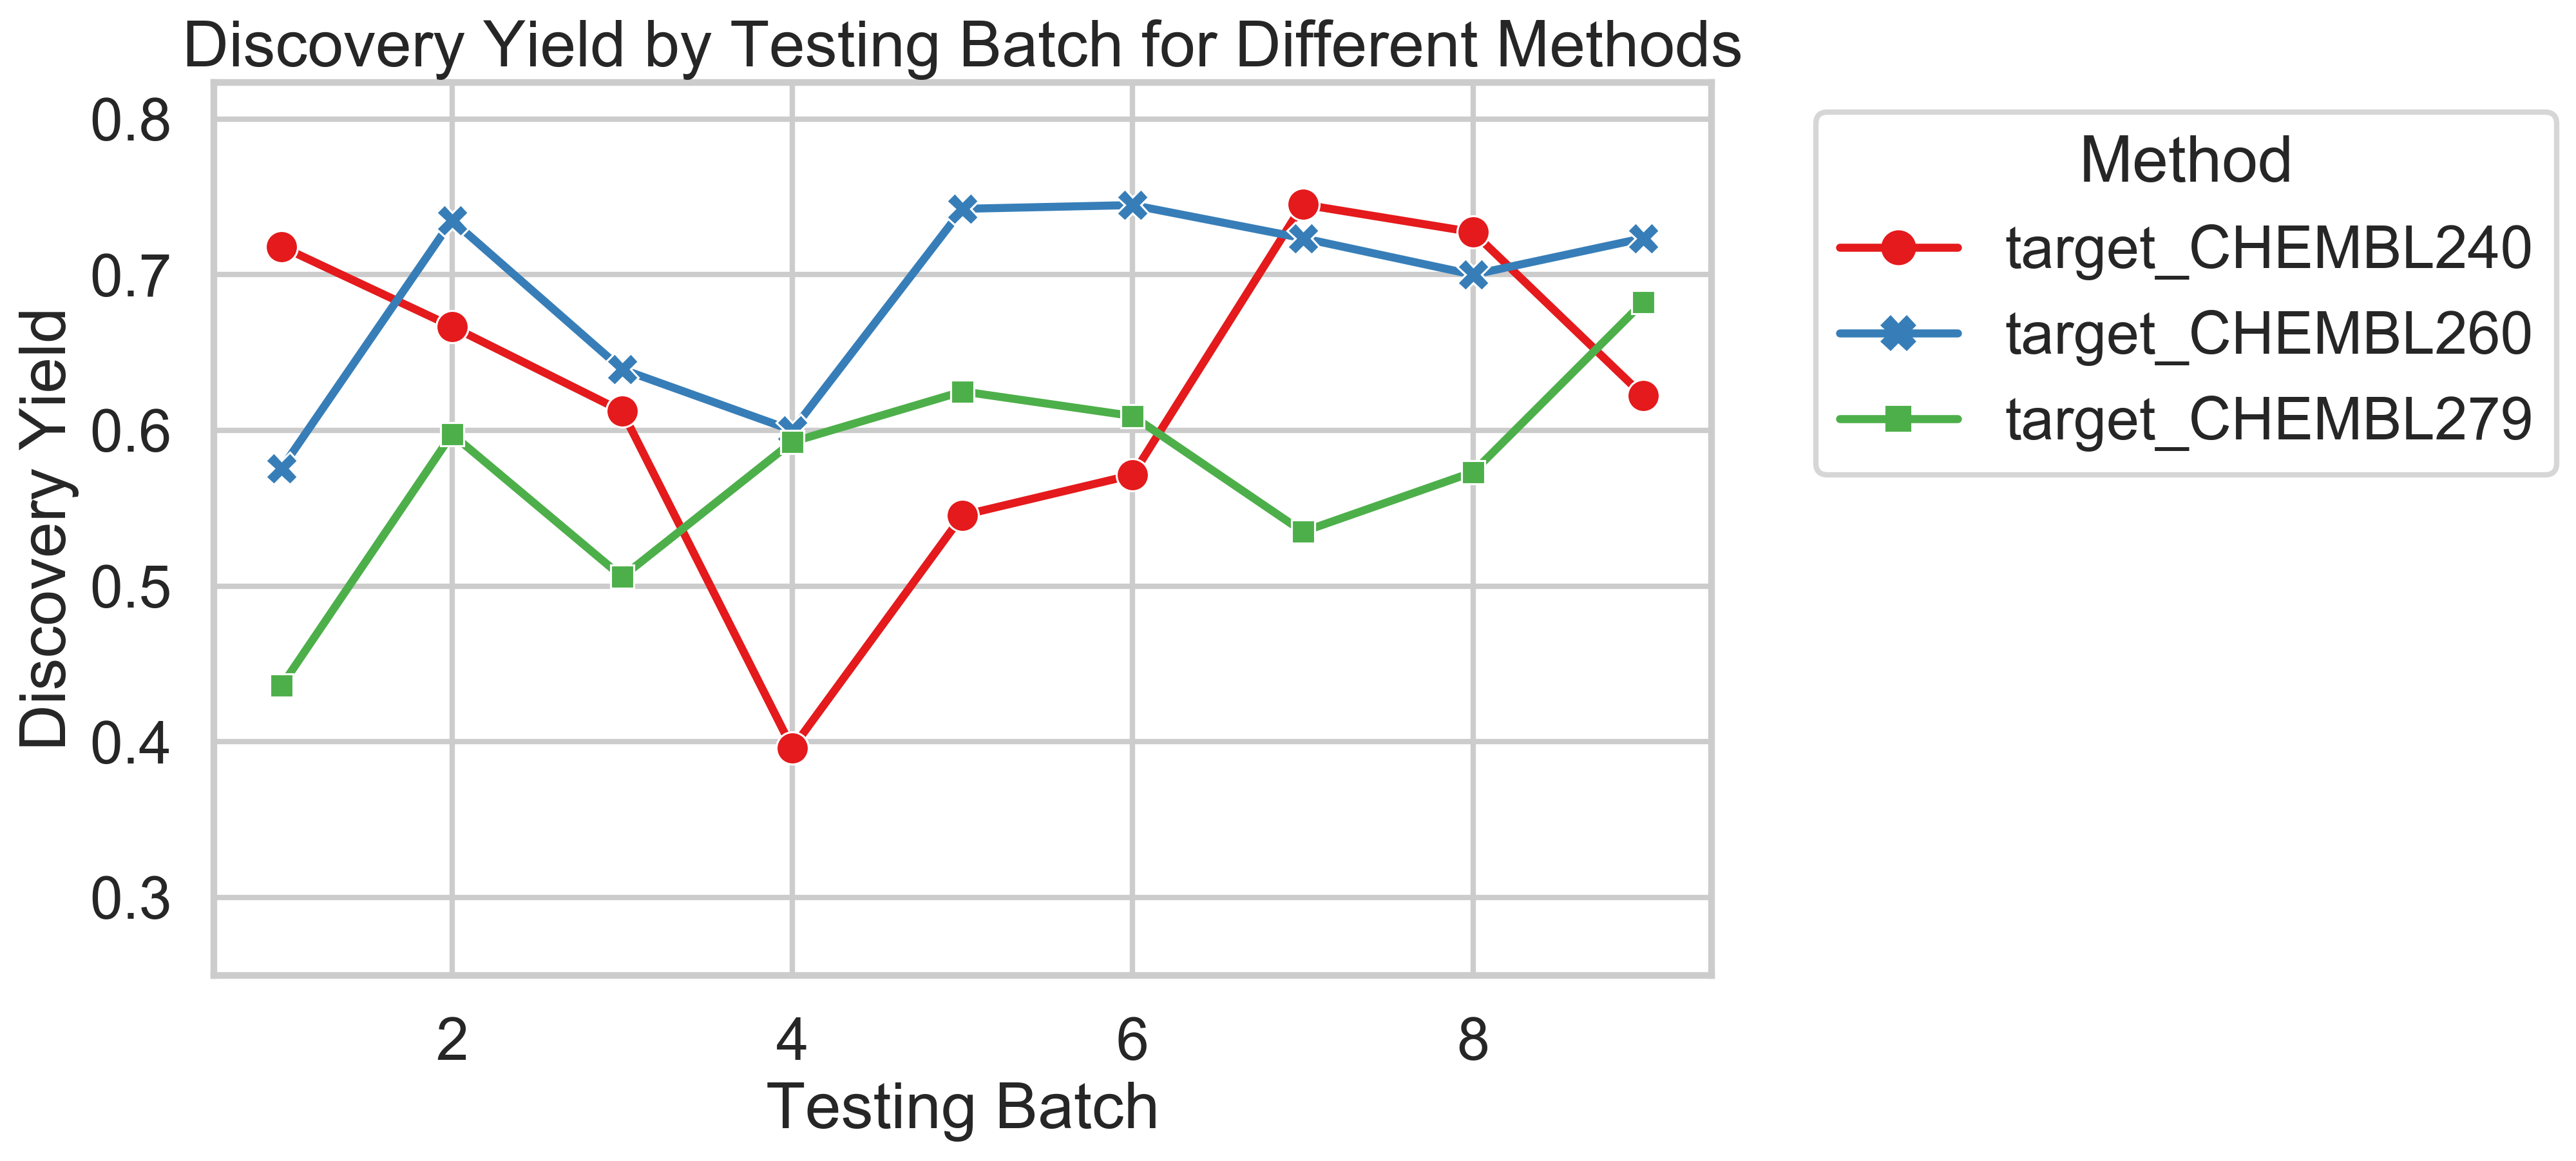

cv


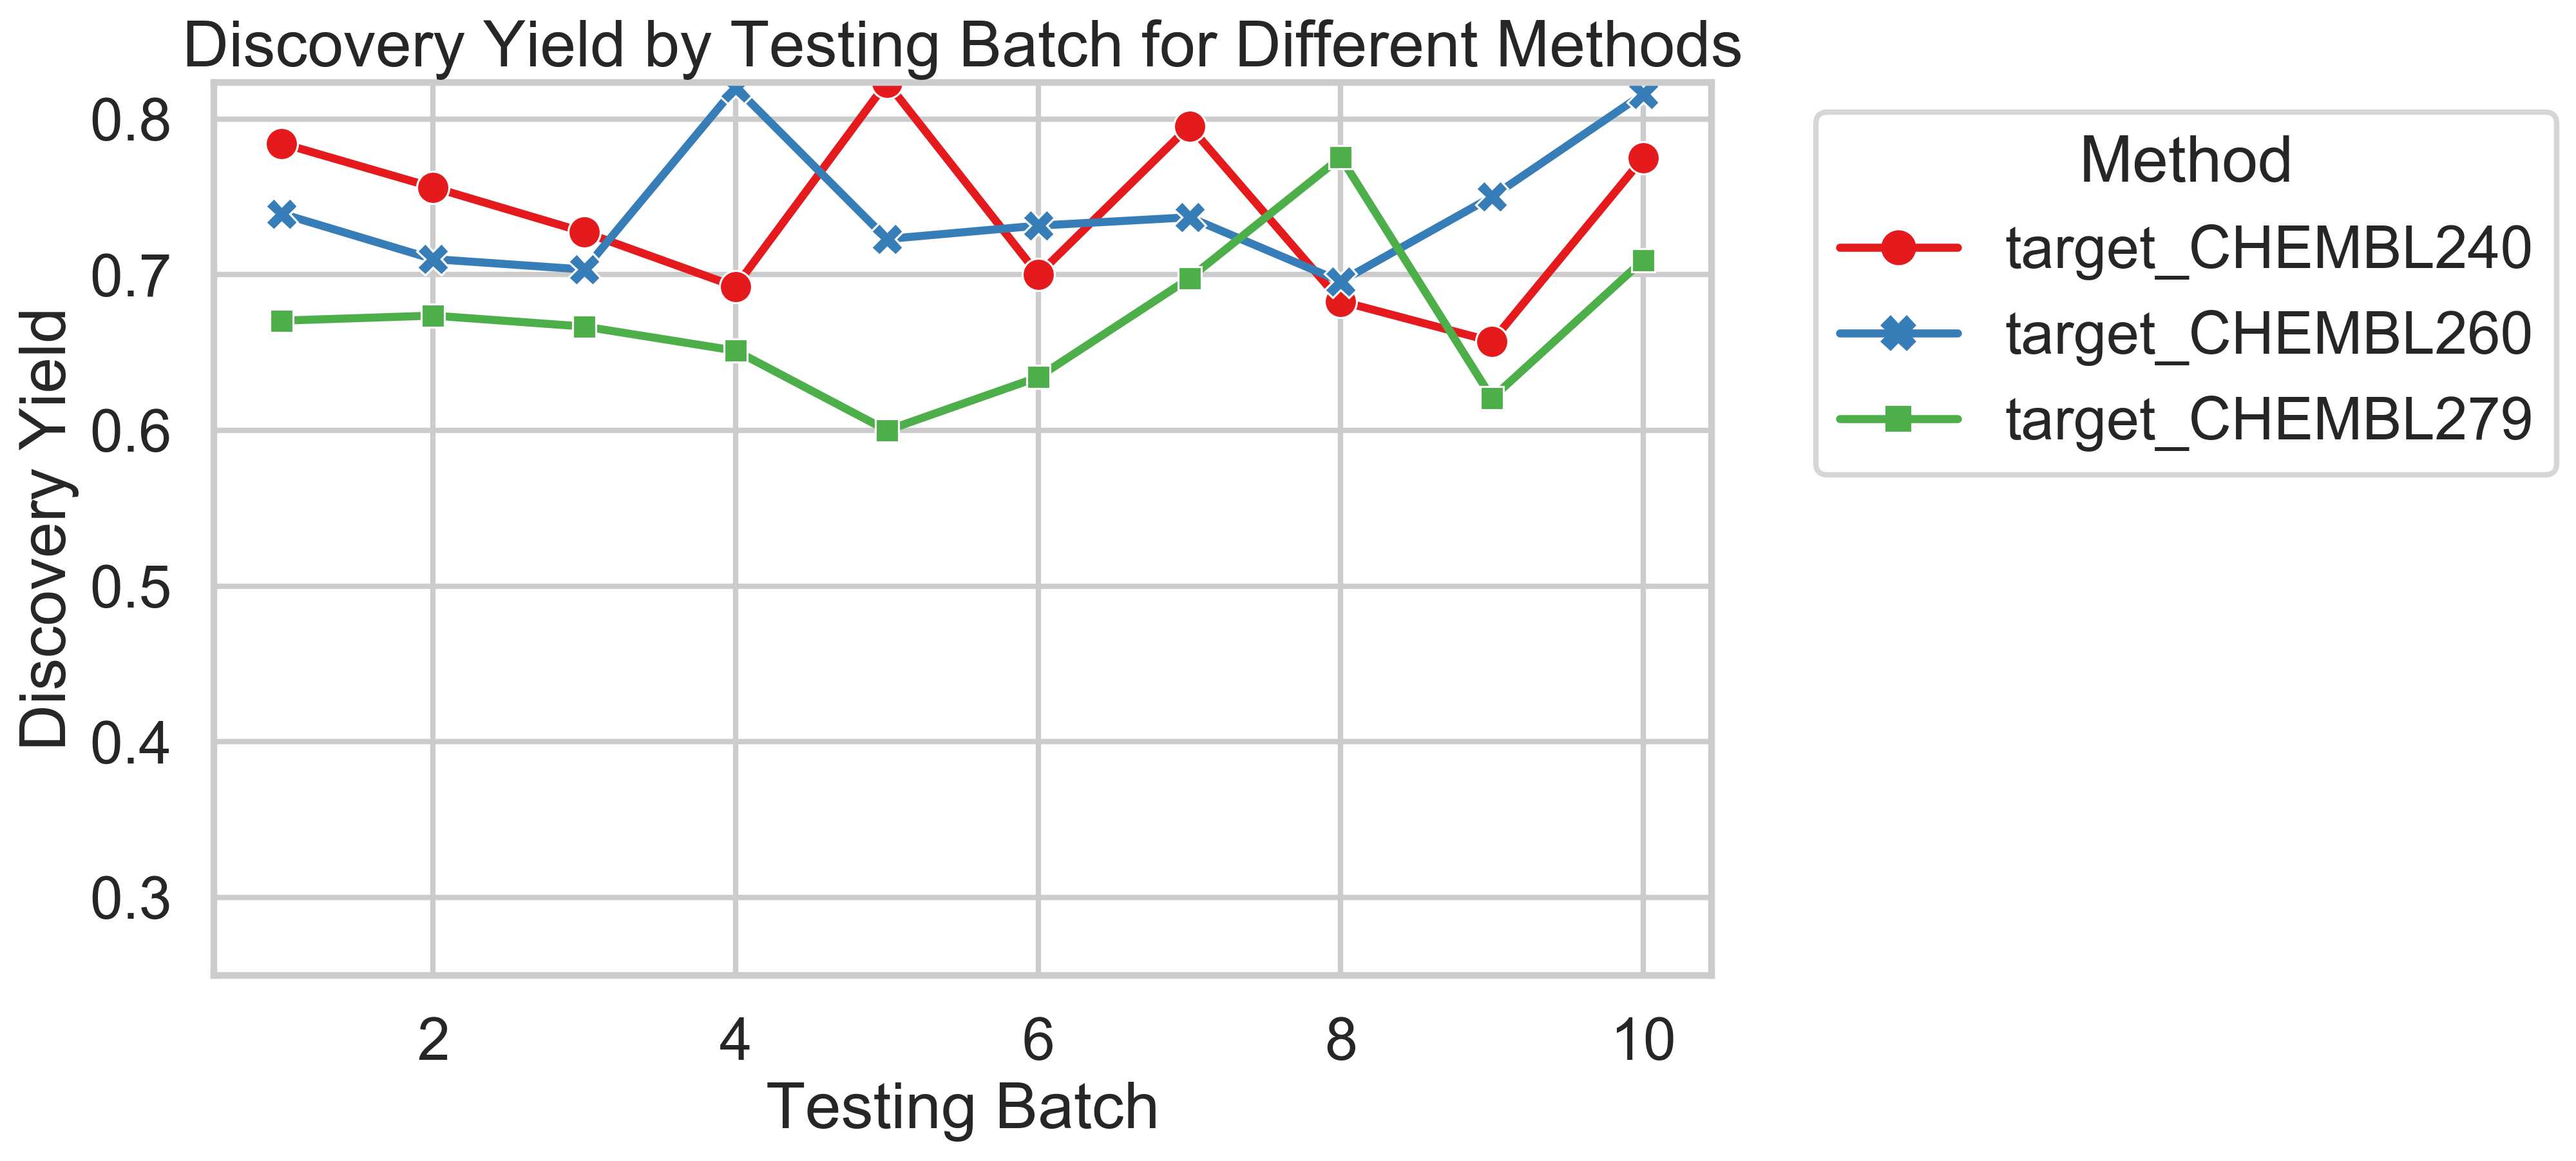

scaffold_CV


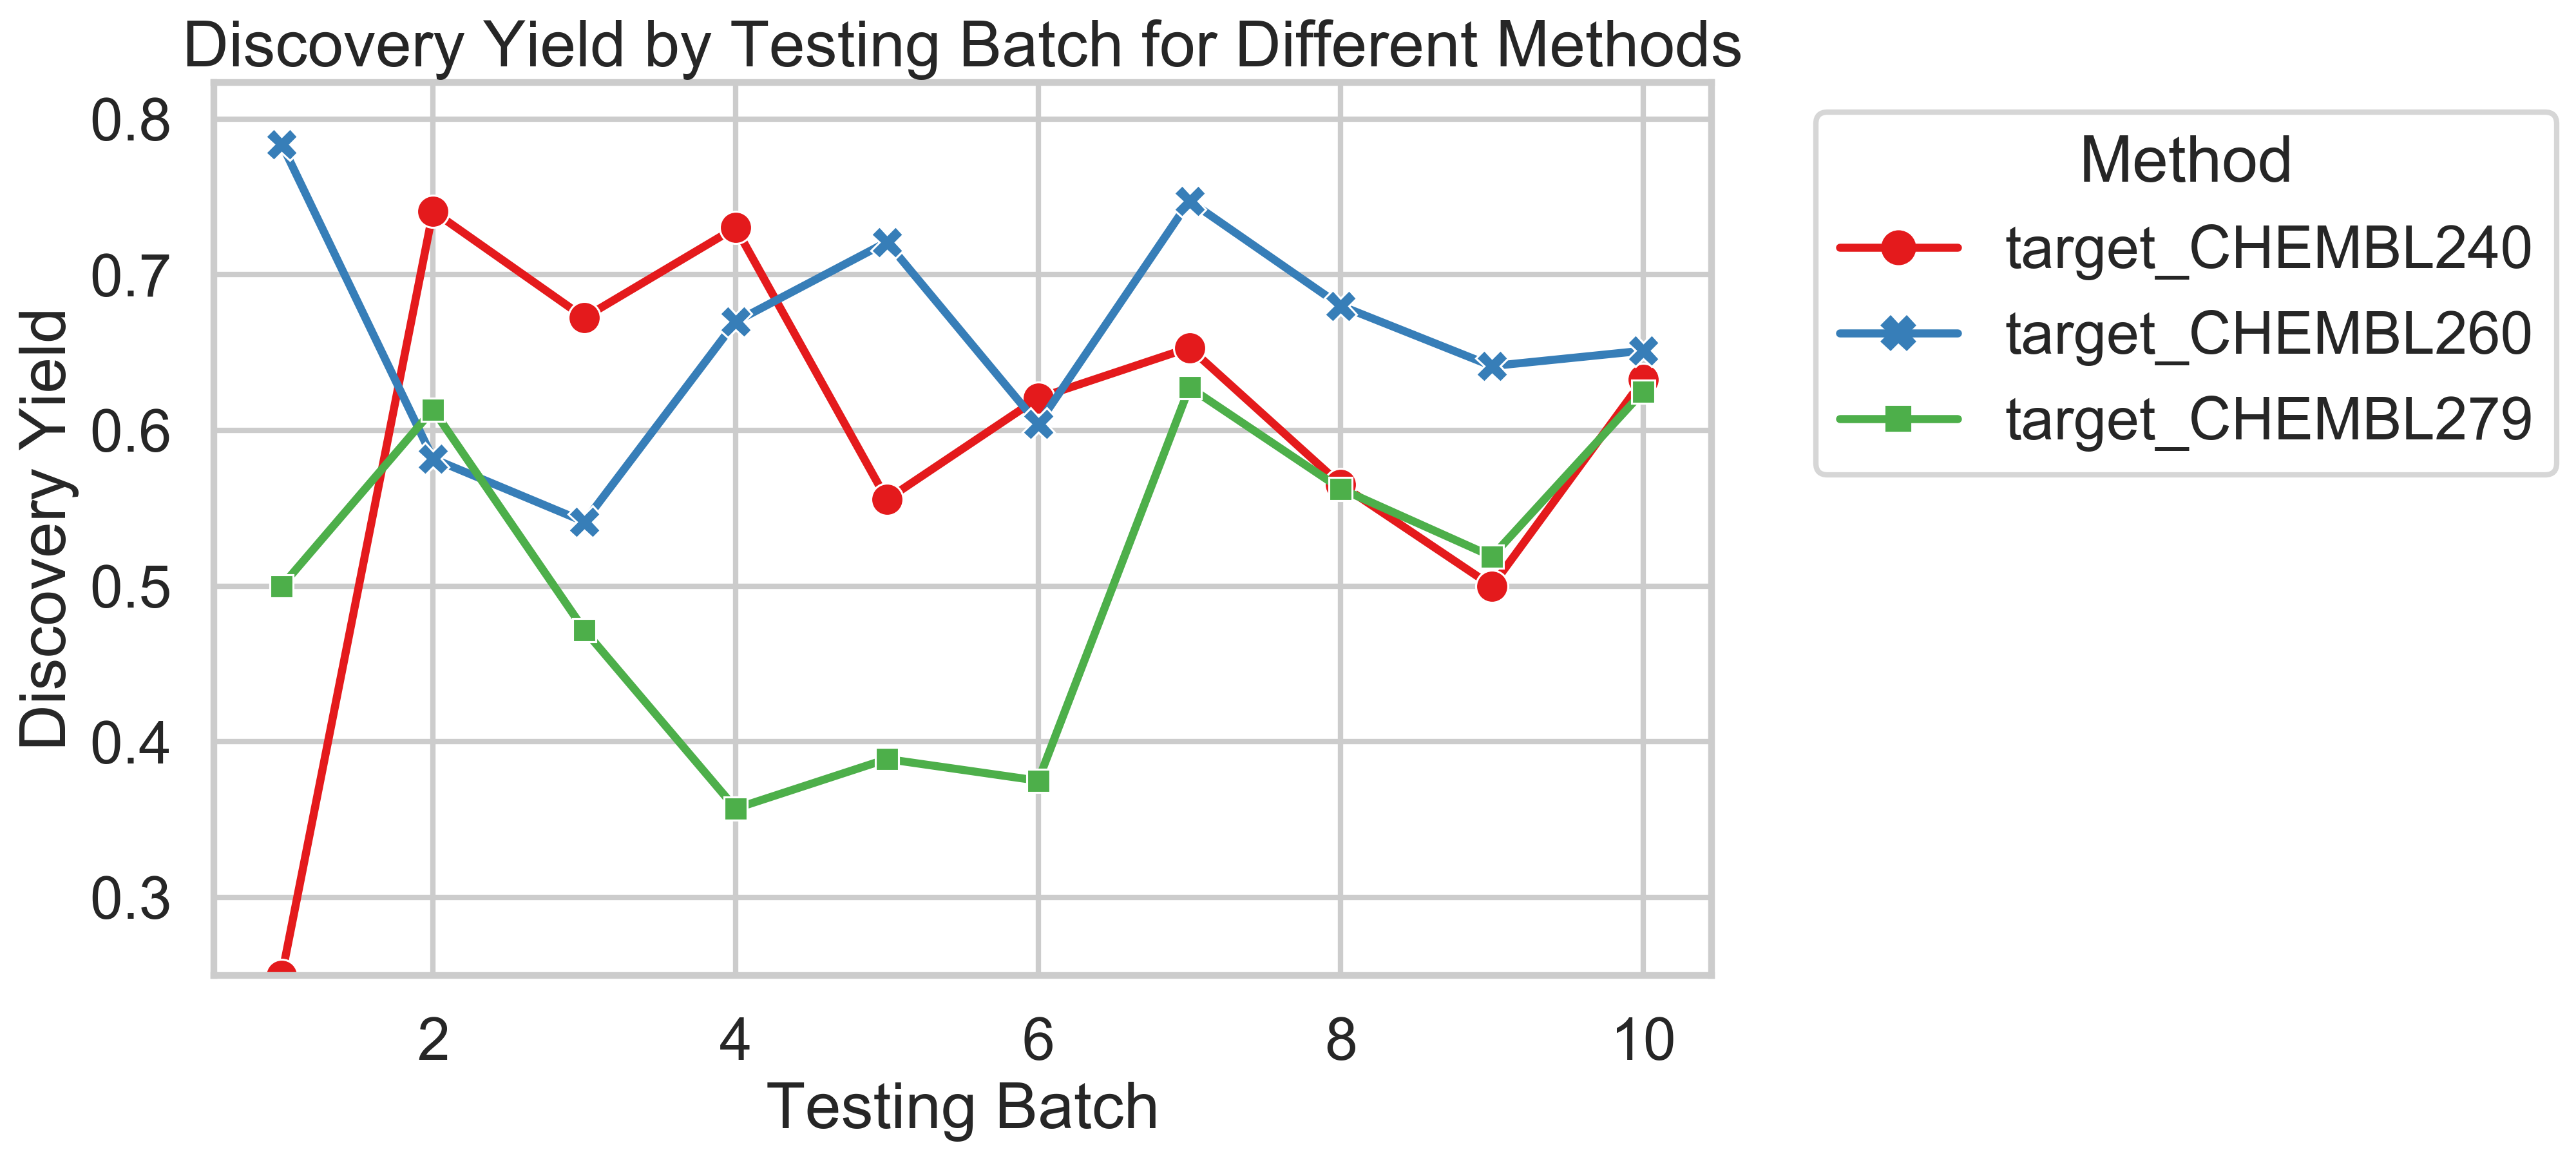

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

sns.set_context("poster")

# First, determine the global minimum and maximum Discovery Yield values to set the y-axis limits
global_min = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Discovery Yield'].min()
global_max = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Discovery Yield'].max()

# Iterating through each unique 'evalt' value
for evalt in df.evalt.unique():
    print(evalt)
    
    # Filtering the DataFrame for the specific conditions
    test = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl") & (df["evalt"] == evalt)]

    # Set up the visualization
    plt.figure(figsize=(10, 6), dpi=300)

    # Create a line plot with scatter points
    sns.lineplot(data=test, x='testing batch', y='Discovery Yield', hue='Target', 
                 marker='o', palette='Set1', markers=True, style='Target', dashes=False)

    # Customize the plot
    plt.title('Discovery Yield by Testing Batch for Different Methods')
    plt.xlabel('Testing Batch')
    plt.ylabel('Discovery Yield')
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set the y-axis limits based on the global min and max values
    plt.ylim(global_min, global_max)

    # Show the plot
    plt.show()

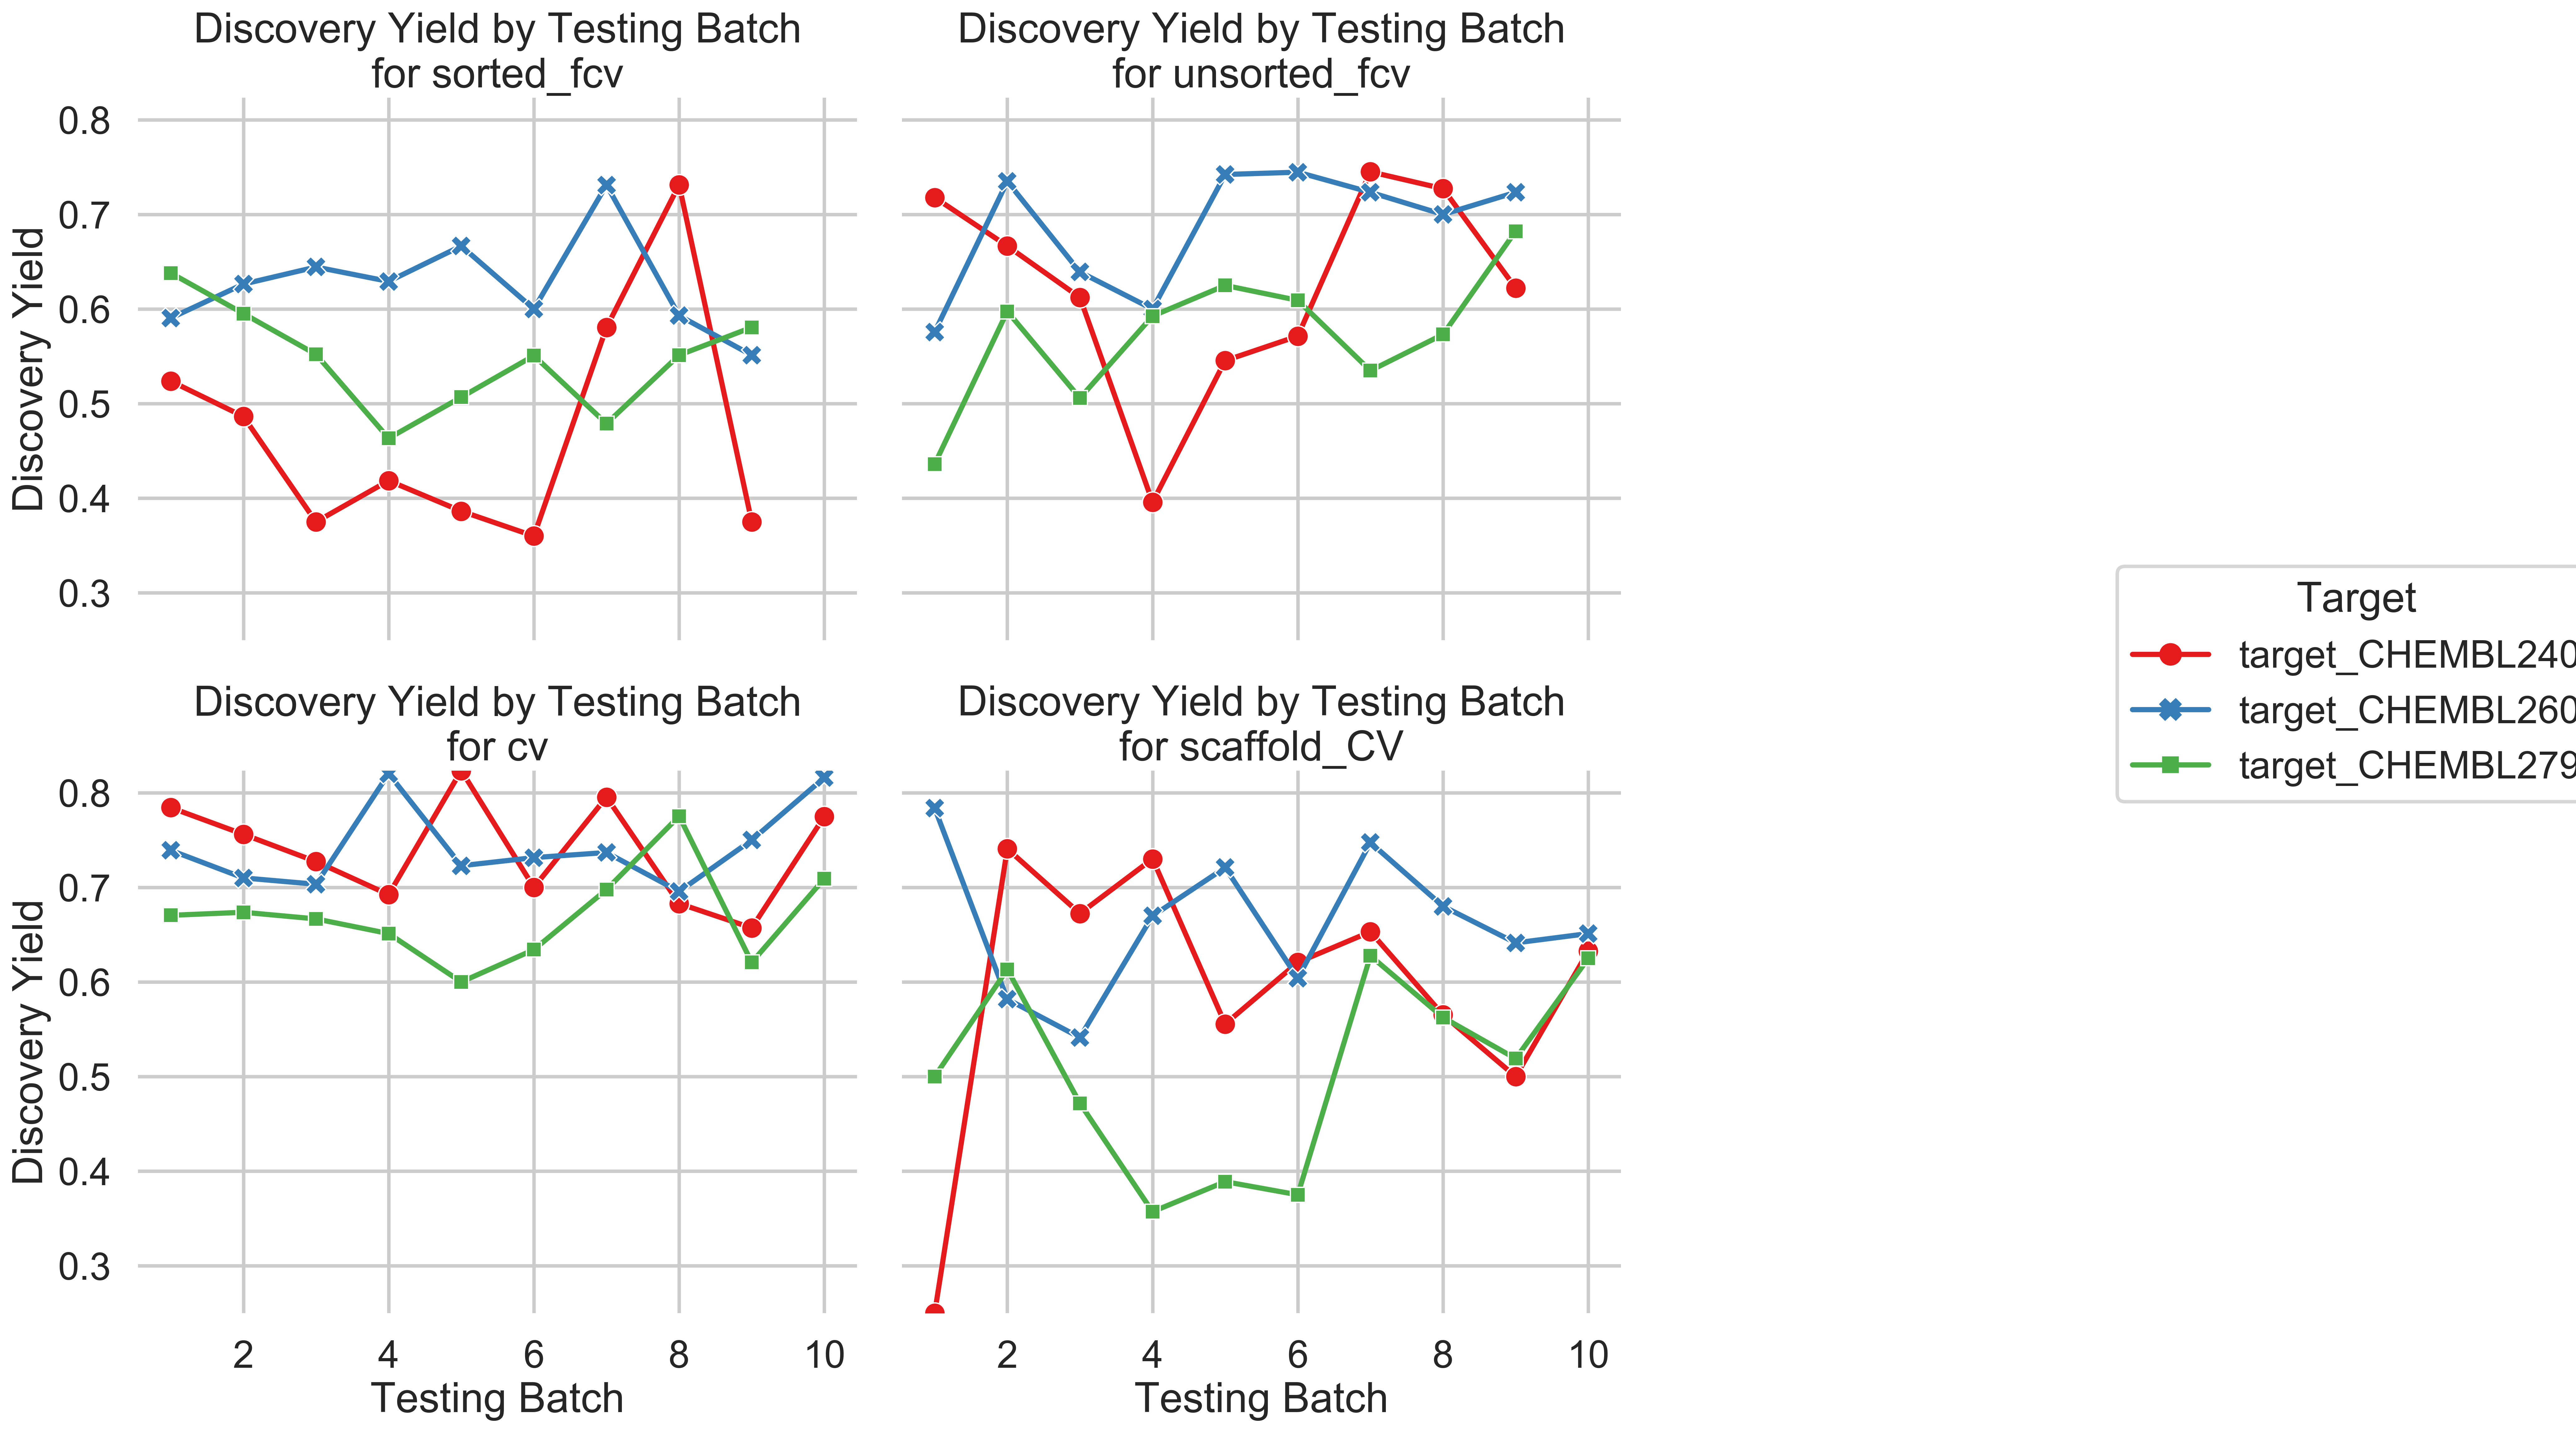

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
sns.set_context("poster")

# Determine the global minimum and maximum Discovery Yield values to set the y-axis limits
global_min = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Discovery Yield'].min()
global_max = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Discovery Yield'].max()

# Get unique evalt values
evalt_values = df.evalt.unique()

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=400, sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each unique 'evalt' value
for i, evalt in enumerate(evalt_values):
    if i >= 4:
        break  # Only create up to 4 plots

    # Filtering the DataFrame for the specific conditions
    test = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl") & (df["evalt"] == evalt)]

    # Create a line plot with scatter points
    sns.lineplot(data=test, x='testing batch', y='Discovery Yield', hue='Target', 
                 marker='o', palette='Set1', markers=True, style='Target', dashes=False, ax=axes[i])

    # Customize the plot
    axes[i].set_title(f'Discovery Yield by Testing Batch\nfor {evalt}')
    axes[i].set_xlabel('Testing Batch')
    axes[i].set_ylabel('Discovery Yield')

# Set the y-axis limits based on the global min and max values
for ax in axes:
    ax.set_ylim(global_min, global_max)

# Create a single legend outside the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Target', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Remove individual legends from subplots
for ax in axes:
    ax.legend_.remove()

# Remove the border of each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [8]:
test[test["Target"]=="target_CHEMBL240"]

testing batch  Total Ideal Compounds  Low Error Count  Discovery Yield  \
252              1                   20.0              5.0         0.250000   
253              2                   27.0             20.0         0.740741   
254              3                   58.0             39.0         0.672414   
255              4                   63.0             46.0         0.730159   
256              5                   36.0             20.0         0.555556   
257              6                   58.0             36.0         0.620690   
258              7                   49.0             32.0         0.653061   
259              8                   46.0             26.0         0.565217   
260              9                   44.0             22.0         0.500000   
261             10                   49.0             31.0         0.632653   

     Standardized Discovery Yield            Target Variable Method  \
252                      0.787500  target_CHEMBL240      NaN     RF   
253                      1.728395  target_CHEMBL240      NaN     RF   
254                      0.730380  target_CHEMBL240      NaN     RF   
255                      0.730159  target_CHEMBL240      NaN     RF   
256                      0.972222  target_CHEMBL240      NaN     RF   
257                      0.674197  target_CHEMBL240      NaN     RF   
258                      0.839650  target_CHEMBL240      NaN     RF   
259                      0.774102  target_CHEMBL240      NaN     RF   
260                      0.715909  target_CHEMBL240      NaN     RF   
261                      0.813411  target_CHEMBL240      NaN     RF   

           evalt  
252  scaffold_CV  
253  scaffold_CV  
254  scaffold_CV  
255  scaffold_CV  
256  scaffold_CV  
257  scaffold_CV  
258  scaffold_CV  
259  scaffold_CV  
260  scaffold_CV  
261  scaffold_CV

target_CHEMBL240


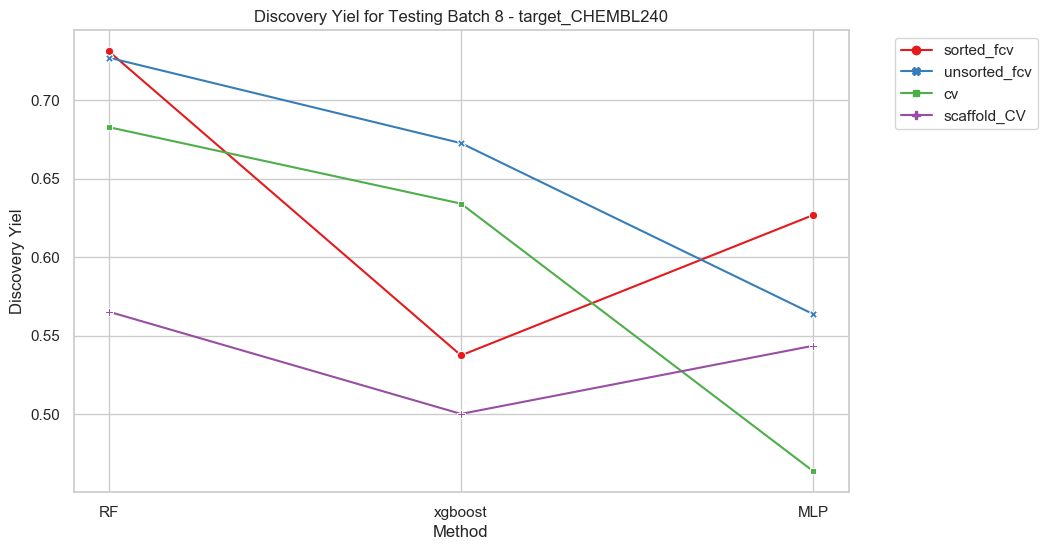

target_CHEMBL260


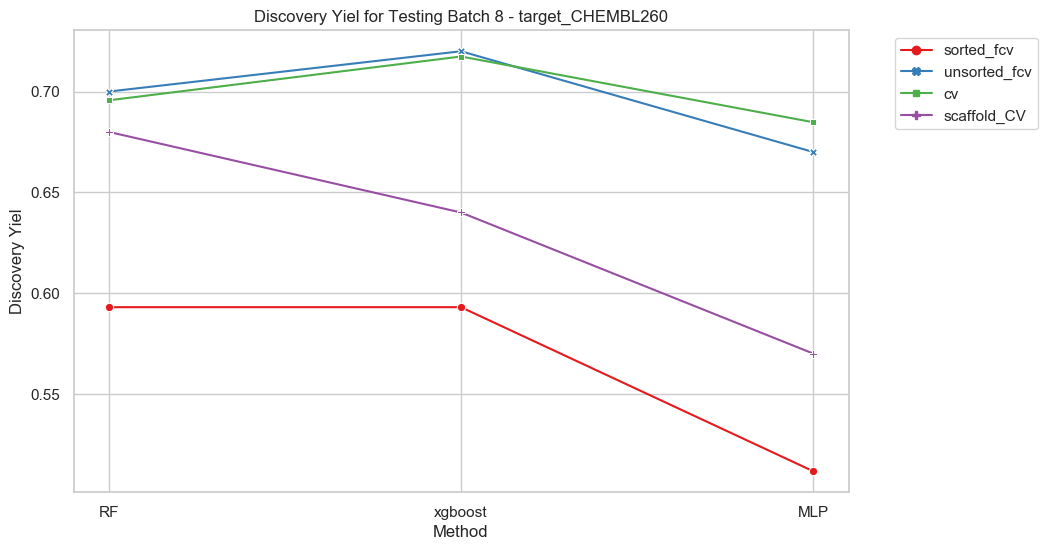

target_CHEMBL279


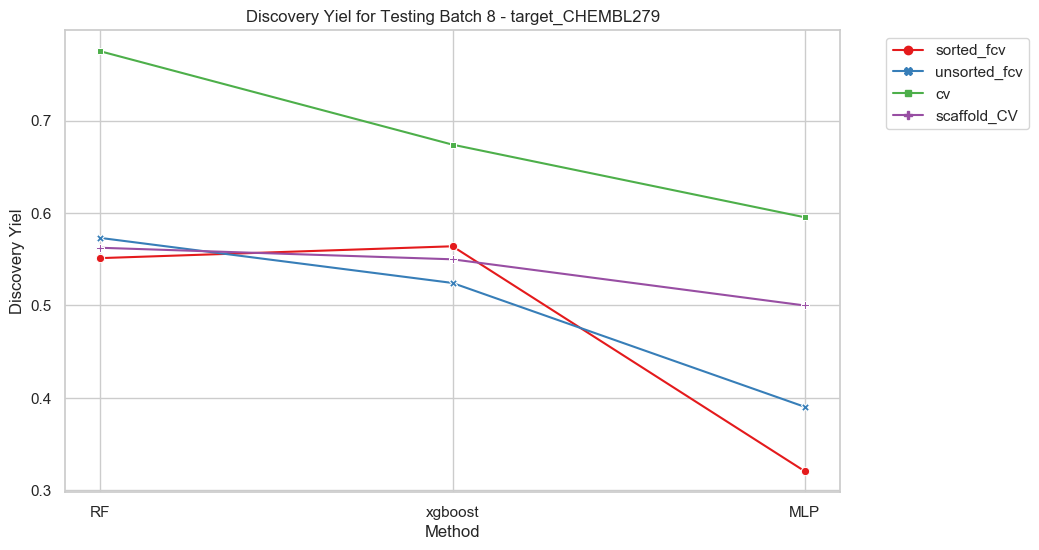

In [9]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    print(target)
    test = df[df["Target"]==target]
    test = test[test["Variable"]!="pchembl"]
    test = test[test["testing batch"] == 8]
    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=test, x='Method', y='Discovery Yield', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'Discovery Yiel for Testing Batch 8 - {target}')
    plt.ylabel('Discovery Yiel')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    # Show the plot
    plt.show()
    

target_CHEMBL240


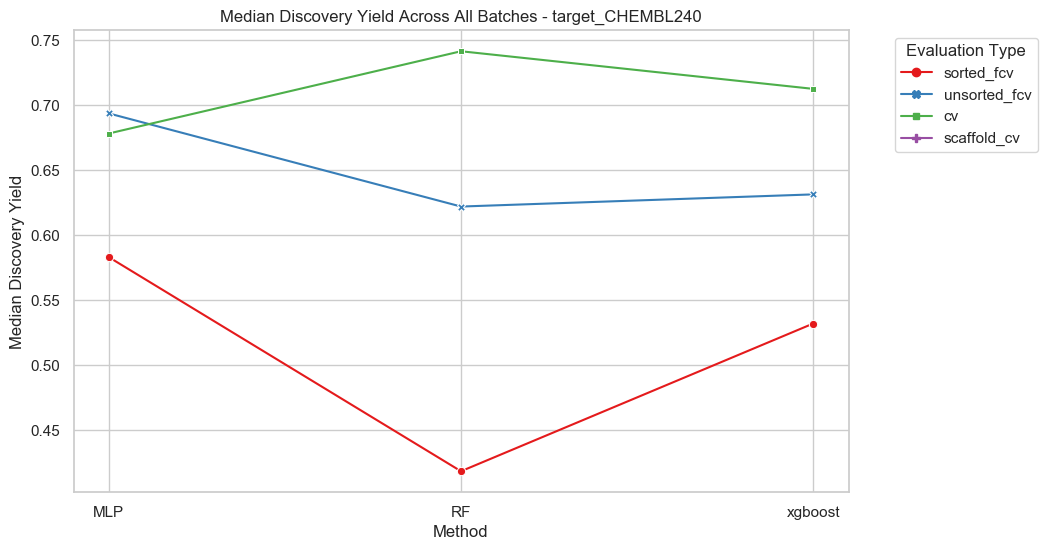

target_CHEMBL260


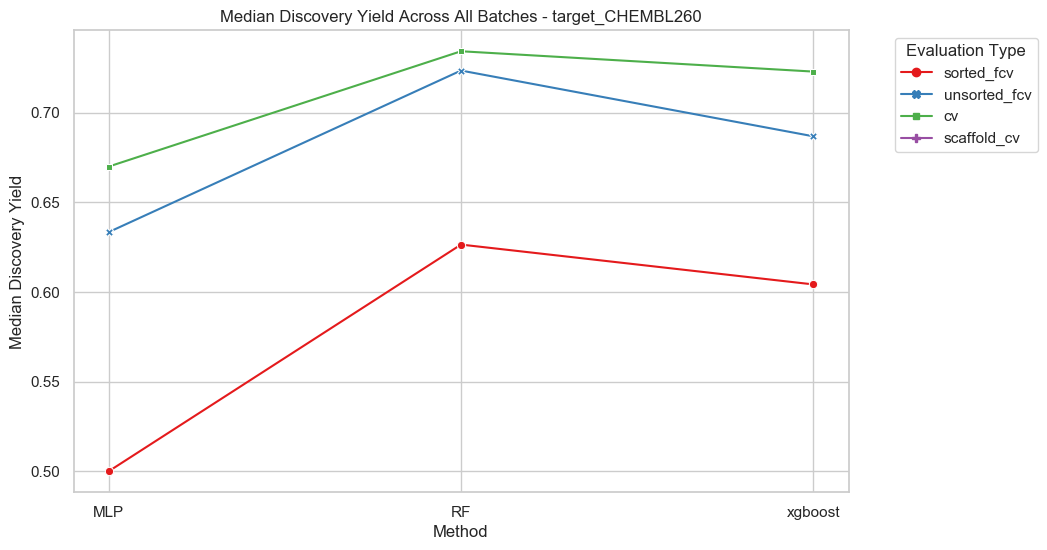

target_CHEMBL279


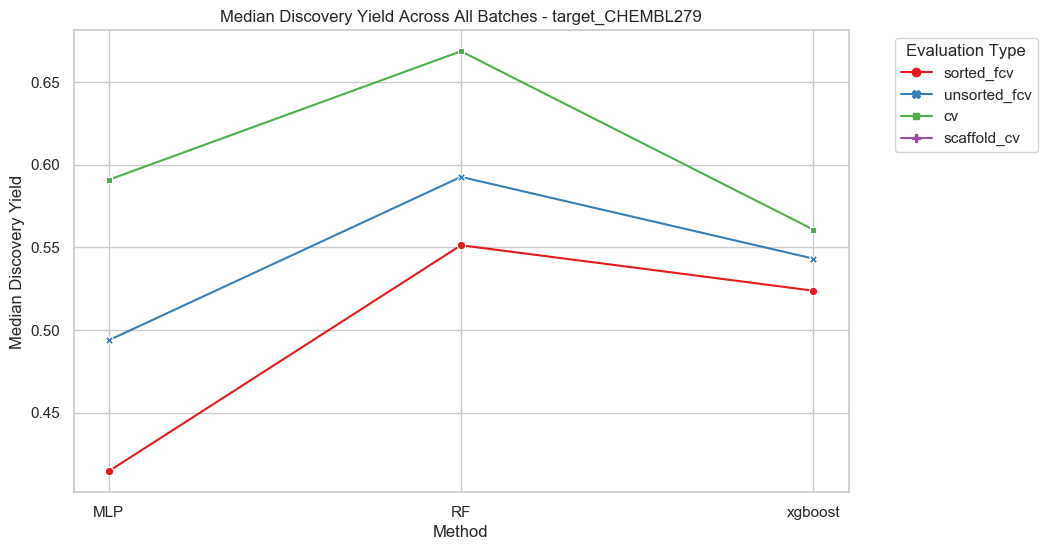

In [10]:
from pandas.api.types import CategoricalDtype

for target in df['Target'].unique():
    print(target)
    test = df[df["Target"] == target]
    test = test[test["Variable"] != "pchembl"]
    
    # Define the order for the 'evalt' categories
    
    cat_type = CategoricalDtype(categories=["sorted_fcv", "unsorted_fcv", "cv", "scaffold_cv"], ordered=True)

    # Apply the custom categorical order to the 'evalt' column
    test['evalt'] = test['evalt'].astype(cat_type)

    # Calculate median Discovery Yield
    median_rmse = test.groupby(['Method', 'evalt'])['Discovery Yield'].median().reset_index()

    # Sort the DataFrame by 'evalt' using the defined order
    median_rmse = median_rmse.sort_values('evalt')

    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=median_rmse, x='Method', y='Discovery Yield', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'Median Discovery Yield Across All Batches - {target}')
    plt.xlabel('Method')
    plt.ylabel('Median Discovery Yield')
    plt.legend(title='Evaluation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()
